**Introduction**

In this notebook we will discuss our choices and technical discoveries from our EDA exploration. Thus we will focus on the 'why' and 'what' but will leave the 'so what' or in other words the suggestions to the report.

In [2]:
import requests
import matplotlib.image as mpimg
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
import pandas as pd
from IPython.display import display

# URL to the Indoor Air Quality (IAQ) JSON data
url = "https://fpardrecruiting002st.z33.web.core.windows.net/CodeEvaluation/DataScientist/iaq.json"

# get the IAQ data from the URL
response_iaq = requests.get(url)
data_iaq = response_iaq.json()

# Creating a DataFrame from the JSON data
df_iaq = pd.DataFrame(data_iaq)
df_iaq['time']= pd.to_datetime(df_iaq['documentTime'])
df_iaq = df_iaq.drop(columns=['documentTime'],axis=1)
df_iaq.sort_values(by='time', ascending=True, inplace=True)
df_iaq 


,temp,humidity,co2,sensor_id,time
7,23.8,23,760.0,ENKZYW001900,2023-01-23 00:00:16+00:00
8,24.2,23,773.0,ENKZYW001883,2023-01-23 00:00:19+00:00
1,23.6,23,778.0,ENKZYW001804,2023-01-23 00:00:48+00:00
3,23.2,47,449.0,ENKZYW001856,2023-01-23 00:01:33+00:00
12,23.2,26,751.0,ENKZYW001925,2023-01-23 00:02:29+00:00
...,...,...,...,...,...
102620,23.9,31,433.0,ENKZYW001900,2023-02-19 23:57:37+00:00
102626,23.0,35,430.0,ENKZYW001925,2023-02-19 23:58:21+00:00
102627,22.0,35,432.0,ENKZYW001882,2023-02-19 23:59:00+00:00
102628,23.2,32,428.0,ENKZYW001848,2023-02-19 23:59:00+00:00


In [3]:
# URL to the Outdoor Air Quality (OAQ) JSON data
url = "https://fpardrecruiting002st.z33.web.core.windows.net/CodeEvaluation/DataScientist/oaq.json"

# get the OAQ data from the URL
response_oaq = requests.get(url)
data_oaq = response_oaq.json()

# Creating a DataFrame from the JSON data
df_oaq = pd.DataFrame(data_oaq)
df_oaq['time']= pd.to_datetime(df_oaq['documentTime'])
df_oaq = df_oaq.drop(columns=['documentTime'],axis=1)
df_oaq.sort_values(by='time', ascending=True, inplace=True)
df_oaq.columns=['out_temperature','out_humidity','windspeed','time']

df_oaq 

,out_temperature,out_humidity,windspeed,time
0,-1.3,89.5,NaN,2023-01-23 01:00:00+00:00
1,-1.5,90.0,NaN,2023-01-23 02:00:00+00:00
2,-1.8,90.0,NaN,2023-01-23 03:00:00+00:00
3,-2.2,90.7,NaN,2023-01-23 04:00:00+00:00
4,-2.3,91.0,NaN,2023-01-23 05:00:00+00:00
...,...,...,...,...
2884,5.3,89.0,0.8,2023-02-20 00:00:00+00:00
2883,5.3,89.0,0.8,2023-02-20 00:00:00+00:00
2882,5.3,89.0,0.8,2023-02-20 00:00:00+00:00
2885,5.3,89.0,0.8,2023-02-20 00:00:00+00:00


In [4]:
# GET THE SENSORS DATA
url = "https://fpardrecruiting002st.z33.web.core.windows.net/CodeEvaluation/DataScientist/floors.json"
response = requests.get(url)
data_sensors = response.json()

In [5]:
data_sensors[0]

{'id': 'H-3F',
 'image': {'name': 'H-3F.png', 'width': 1000, 'height': 646},
 'sensors': [{'sensor_id': 'ENKZYW001792',
   'location': {'y': 487.47, 'x': 355.19}},
  {'sensor_id': 'ENKZYW001804', 'location': {'y': 313.77, 'x': 203.47}},
  {'sensor_id': 'ENKZYW001819', 'location': {'y': 153.54, 'x': 387.91}},
  {'sensor_id': 'ENKZYW001837', 'location': {'y': 134.67, 'x': 609.73}},
  {'sensor_id': 'ENKZYW001848', 'location': {'y': 156.61, 'x': 891.23}},
  {'sensor_id': 'ENKZYW001856', 'location': {'y': 314.84, 'x': 920.65}},
  {'sensor_id': 'ENKZYW001882', 'location': {'y': 488.12, 'x': 875.91}}]}

In [6]:
data_sensors[1]

{'id': 'H-4F',
 'image': {'name': 'H-4F.png', 'width': 1000, 'height': 646},
 'sensors': [{'sensor_id': 'ENKZYW001883',
   'location': {'y': 449.36, 'x': 351.34}},
  {'sensor_id': 'ENKZYW001884', 'location': {'y': 321.73, 'x': 208.76}},
  {'sensor_id': 'ENKZYW001888', 'location': {'y': 141.12, 'x': 306.65}},
  {'sensor_id': 'ENKZYW001900', 'location': {'y': 139.42, 'x': 602.35}},
  {'sensor_id': 'ENKZYW001925', 'location': {'y': 140.07, 'x': 788.43}},
  {'sensor_id': 'ENKZYW001935', 'location': {'y': 330.12, 'x': 919.71}},
  {'sensor_id': 'ENKZYW001958', 'location': {'y': 446.13, 'x': 784.86}}]}

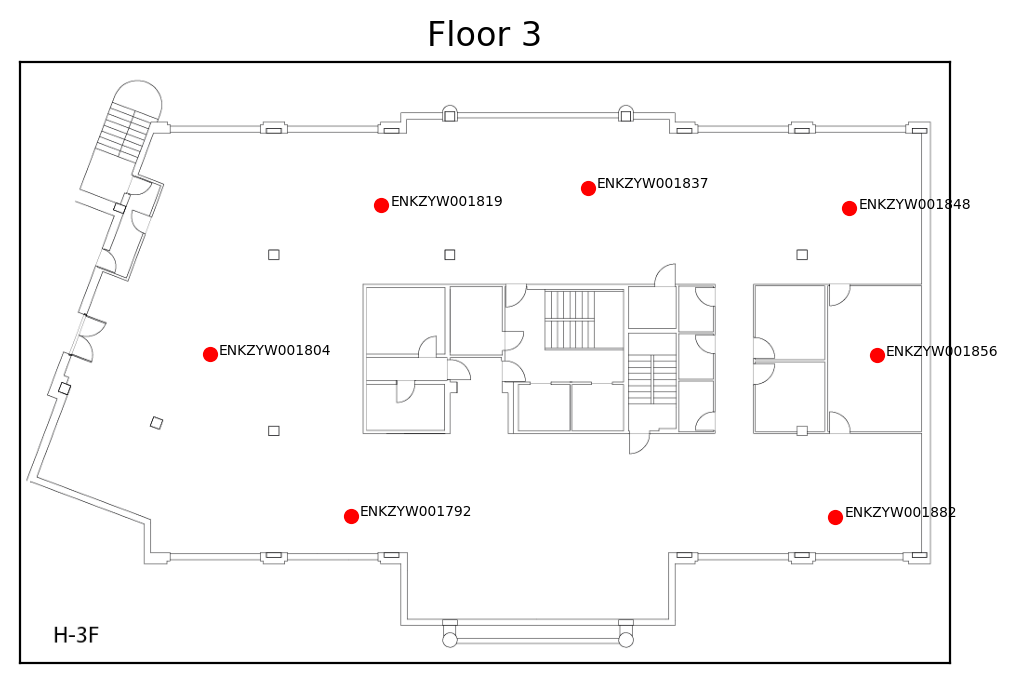

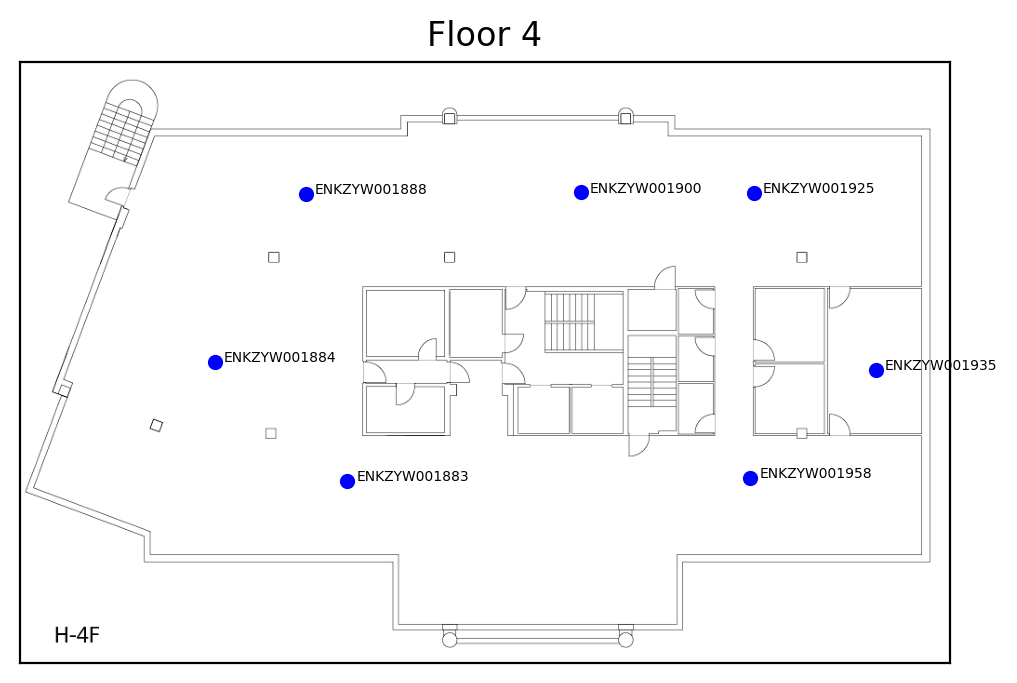

In [63]:
# Plot both floors with the sensors mapped at the correct locations
img_fl3 = mpimg.imread('./H-3F.png')
img_fl4 = mpimg.imread('./H-4F.png')
floor_colors=['red','blue']
floor_images = [img_fl3,img_fl4]
floor_index = {}
num_floors = 2

for i in range(num_floors):
    
    data = data_sensors[i]
    id = data['id']
    sensors = data['sensors']
    num_sensors = len(sensors)
    
    # High DPI plot
    plt.figure(figsize=(6, 6), dpi=200) 
    plt.imshow(floor_images[i])

    for j in range(num_sensors):
        
        x,y = sensors[j]['location']['x'],sensors[j]['location']['y']
        sensor_id = sensors[j]['sensor_id']

        plt.scatter(x, y, s=20, c=f'{floor_colors[i]}')  # Plot the circle
        plt.text(x + 10, y, f'{sensor_id}', color='black', fontsize=5)   # Add IDs


        # Get the floor id for each sensor_id
        if i == 0:
            floor_index[sensor_id]=3
        else:
            floor_index[sensor_id]=4


    
    plt.title(f"Floor {i+3}")

    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

    # Show the plot
    plt.show()

# Exploratory Data Analysis

In [8]:
# Update the dataframe with the new floor index column
floor_index_column = []
for index in df_iaq.sensor_id:
    floor_index_column.append(floor_index[index])

df_iaq['floor_index'] = floor_index_column
df_iaq 


,temp,humidity,co2,sensor_id,time,floor_index
7,23.8,23,760.0,ENKZYW001900,2023-01-23 00:00:16+00:00,4
8,24.2,23,773.0,ENKZYW001883,2023-01-23 00:00:19+00:00,4
1,23.6,23,778.0,ENKZYW001804,2023-01-23 00:00:48+00:00,3
3,23.2,47,449.0,ENKZYW001856,2023-01-23 00:01:33+00:00,3
12,23.2,26,751.0,ENKZYW001925,2023-01-23 00:02:29+00:00,4
...,...,...,...,...,...,...
102620,23.9,31,433.0,ENKZYW001900,2023-02-19 23:57:37+00:00,4
102626,23.0,35,430.0,ENKZYW001925,2023-02-19 23:58:21+00:00,4
102627,22.0,35,432.0,ENKZYW001882,2023-02-19 23:59:00+00:00,3
102628,23.2,32,428.0,ENKZYW001848,2023-02-19 23:59:00+00:00,3


In [9]:
# Split the dataframe for each floor
df_iaq_floor_3 = df_iaq[df_iaq['floor_index']==3].copy()
df_iaq_floor_4 = df_iaq[df_iaq['floor_index']==4].copy()

In [10]:
# Add z-scores for outliers
for df in [df_iaq_floor_3,df_iaq_floor_4]:
    for stat in ['temp','co2','humidity']:
        mean = df[stat].mean()
        std = df[stat].std()
        df[f'outlier_{stat}'] = abs(df[stat].apply(lambda x: (x-mean)/std))>3

df_iaq_floor_3


,temp,humidity,co2,sensor_id,time,floor_index,outlier_temp,outlier_co2,outlier_humidity
1,23.6,23,778.0,ENKZYW001804,2023-01-23 00:00:48+00:00,3,False,False,False
3,23.2,47,449.0,ENKZYW001856,2023-01-23 00:01:33+00:00,3,False,False,False
0,23.5,22,788.0,ENKZYW001792,2023-01-23 00:03:37+00:00,3,False,False,False
6,23.3,24,789.0,ENKZYW001819,2023-01-23 00:03:55+00:00,3,False,False,False
5,23.6,23,796.0,ENKZYW001837,2023-01-23 00:04:18+00:00,3,False,False,False
...,...,...,...,...,...,...,...,...,...
102618,23.5,32,434.0,ENKZYW001837,2023-02-19 23:57:05+00:00,3,False,False,False
102616,23.2,32,435.0,ENKZYW001856,2023-02-19 23:57:24+00:00,3,False,False,False
102627,22.0,35,432.0,ENKZYW001882,2023-02-19 23:59:00+00:00,3,False,False,False
102628,23.2,32,428.0,ENKZYW001848,2023-02-19 23:59:00+00:00,3,False,False,False


In [11]:
# Descriptive statistics for floor 3
df_iaq_floor_3.describe()

,temp,humidity,co2,floor_index
count,51667.000000,51667.000000,51667.000000,51667.0
mean,23.728393,30.789885,553.198947,3.0
std,1.210267,5.602234,136.709146,0.0
min,13.000000,20.000000,411.000000,3.0
25%,23.200000,27.000000,445.000000,3.0
50%,23.900000,29.000000,505.000000,3.0
75%,24.500000,33.000000,632.000000,3.0
max,27.200000,62.000000,1378.000000,3.0


In [12]:
# Descriptive statistics for floor 4
df_iaq_floor_4.describe()

,temp,humidity,co2,floor_index
count,50962.000000,50962.000000,50962.000000,50962.0
mean,23.306430,31.763628,577.723833,4.0
std,1.047308,4.460310,161.518789,0.0
min,19.300000,21.000000,411.000000,4.0
25%,22.700000,28.000000,447.000000,4.0
50%,23.500000,31.000000,512.000000,4.0
75%,24.000000,34.000000,681.000000,4.0
max,26.000000,46.000000,1316.000000,4.0


In [13]:
# Descriptive statistics for the outdoor data
df_oaq.describe()

,out_temperature,out_humidity,windspeed
count,2892.000000,2892.000000,1814.000000
mean,8.109336,82.011929,1.670838
std,2.944377,6.163737,1.335680
min,-2.700000,50.000000,0.100000
25%,6.200000,79.000000,0.800000
50%,8.300000,83.000000,0.800000
75%,10.500000,86.700000,2.775000
max,13.800000,93.000000,8.100000


In [14]:
# T-Test for floor 3 and floor 4


for stat in ['temp','humidity','co2']:

    t_statistic, p_value = stats.ttest_ind(df_iaq_floor_3[stat], df_iaq_floor_4[stat])

    print(f"t-statistic for {stat}: ", t_statistic)
    print(f"p-value {stat}:", p_value)
    print()

t-statistic for temp:  59.691770992315696
p-value temp: 0.0

t-statistic for humidity:  -30.77857556584241
p-value humidity: 4.474693030237119e-207

t-statistic for co2:  -26.2683317412236
p-value co2: 1.4051807990542839e-151



**Discussion**


We have decided to split the dataset into two floors as we believe there might be a difference in the environment due to inner factors like the location and performance of heating and cooling systems, differences in room usage or occupancy patterns, varying exposure to natural light, and potential variations in insulation or building materials between the two floors. Additionally, external factors like the position of the floors within the building (e.g., higher floors may be warmer due to rising heat) and proximity to outdoor elements (such as direct sunlight or wind exposure) could also contribute to differing environmental conditions.

We can observe from the above results that the mean and median temperature, CO2, and humidity for both floors comply with the necessary regulation levels. However, for both floors from the min and max values we can also note that there are instances of CO2 and temperatures which are outside the mandatory levels. The outdoor temperature is much lower than the indoor one and the humidity is much higher which is expected as the time period of the measurements was during winter season.

We have compared the distributions of temperature, humidity, and CO2 levels for both floors using T-test and based on the observed p-values (much smaller than 0.05) we can conclude that the humidity and the CO2 features are statistically significant which potentially makes our further research even more interesting.

In addition, we have chosen to use the Z-statistic instead of IQR as using IQR usually assumes normally distributed data and based on the further plots we see that this is not the case.

# Duplicates

**Discussion**
In this section we handle duplicate values for both floors and the outdoor set. We have noticed for the outdoor set that there are sometimes multiple entries for a specific hour and day which should not be the case as we expect to have a single measurement for each hour based on the description of the assessment. For example for day 24 and hour 17 there are 9 entries, 8 of which are duplicates. Our assumption here is that these measurements are not errors (of course this is not certain as we do not have more domain knowledge for the data) so we assume we indeed have a scenario in which sensors can happen to measure temperature, humidity, or windspeed multiple times within an hour, so we group our columns by day and hour and calculate the mean. 


In [15]:
df_oaq 

,out_temperature,out_humidity,windspeed,time
0,-1.3,89.5,NaN,2023-01-23 01:00:00+00:00
1,-1.5,90.0,NaN,2023-01-23 02:00:00+00:00
2,-1.8,90.0,NaN,2023-01-23 03:00:00+00:00
3,-2.2,90.7,NaN,2023-01-23 04:00:00+00:00
4,-2.3,91.0,NaN,2023-01-23 05:00:00+00:00
...,...,...,...,...
2884,5.3,89.0,0.8,2023-02-20 00:00:00+00:00
2883,5.3,89.0,0.8,2023-02-20 00:00:00+00:00
2882,5.3,89.0,0.8,2023-02-20 00:00:00+00:00
2885,5.3,89.0,0.8,2023-02-20 00:00:00+00:00


In [16]:
# Add hour and date
df_oaq['hour'] = df_oaq['time'].dt.hour
df_oaq['day']= df_oaq['time'].dt.dayofyear 
df_oaq

,out_temperature,out_humidity,windspeed,time,hour,day
0,-1.3,89.5,NaN,2023-01-23 01:00:00+00:00,1,23
1,-1.5,90.0,NaN,2023-01-23 02:00:00+00:00,2,23
2,-1.8,90.0,NaN,2023-01-23 03:00:00+00:00,3,23
3,-2.2,90.7,NaN,2023-01-23 04:00:00+00:00,4,23
4,-2.3,91.0,NaN,2023-01-23 05:00:00+00:00,5,23
...,...,...,...,...,...,...
2884,5.3,89.0,0.8,2023-02-20 00:00:00+00:00,0,51
2883,5.3,89.0,0.8,2023-02-20 00:00:00+00:00,0,51
2882,5.3,89.0,0.8,2023-02-20 00:00:00+00:00,0,51
2885,5.3,89.0,0.8,2023-02-20 00:00:00+00:00,0,51


In [17]:
# check if we have duplicates for day and hour
days = df_oaq['day'].unique()
for day in days:
    if len(df_oaq[df_oaq['day']==day]['hour']) != len(df_oaq[df_oaq['day']==day]['hour'].unique()):
        print(day)

24
25
27
28
29
30
31
32
33
34
35
36
37
39
41
42
43
44
45
46
47
48
49
50
51


In [18]:
def duplicates_day(day, df=df_oaq):
    """
    Finds duplicate hourly entries for a specified day in a dataframe.

    Parameters:
    day : int or str
        The day to check for duplicate hours.
    df : pandas.DataFrame, optional
        The dataframe to search, defaults to df_oaq.

    Returns:
    list
        A list of hours (integers) with duplicate entries for the given day.
    """
    
    # Filter the dataframe for the given day
    day_df = df[df['day'] == day]
    
    # Get the list of hours for the filtered day
    hours = list(day_df['hour'])
    
    # Find duplicates: an hour is a duplicate if its count is more than 1
    duplicates = set([hour for hour in hours if hours.count(hour) > 1])

    return list(duplicates)

In [19]:
print(duplicates_day(24))

[17]


In [20]:
df_oaq[(df_oaq['day']==24)&(df_oaq['hour']==17)]

,out_temperature,out_humidity,windspeed,time,hour,day
49,3.3,83.0,NaN,2023-01-24 17:00:00+00:00,17,24
48,3.3,83.0,NaN,2023-01-24 17:00:00+00:00,17,24
47,3.3,83.0,NaN,2023-01-24 17:00:00+00:00,17,24
46,3.3,83.0,NaN,2023-01-24 17:00:00+00:00,17,24
45,3.3,83.0,NaN,2023-01-24 17:00:00+00:00,17,24
44,3.3,83.0,NaN,2023-01-24 17:00:00+00:00,17,24
43,3.3,83.0,NaN,2023-01-24 17:00:00+00:00,17,24
42,3.3,83.0,NaN,2023-01-24 17:00:00+00:00,17,24
40,3.3,82.0,NaN,2023-01-24 17:00:00+00:00,17,24


In [21]:
print(duplicates_day(25))

[23]


In [22]:
df_oaq[(df_oaq['day']==25)&(df_oaq['hour']==23)]

,out_temperature,out_humidity,windspeed,time,hour,day
85,4.4,92.0,NaN,2023-01-25 23:00:00+00:00,23,25
84,4.4,92.0,NaN,2023-01-25 23:00:00+00:00,23,25
83,4.4,92.0,NaN,2023-01-25 23:00:00+00:00,23,25
82,4.4,92.0,NaN,2023-01-25 23:00:00+00:00,23,25
78,4.8,92.4,NaN,2023-01-25 23:00:00+00:00,23,25
80,4.4,92.0,NaN,2023-01-25 23:00:00+00:00,23,25
79,4.4,92.0,NaN,2023-01-25 23:00:00+00:00,23,25
81,4.4,92.0,NaN,2023-01-25 23:00:00+00:00,23,25


In [23]:
print(duplicates_day(27))

[8, 3, 13, 7]


In [24]:
display(df_oaq[(df_oaq['day']==27)&(df_oaq['hour']==8)])
display(df_oaq[(df_oaq['day']==27)&(df_oaq['hour']==3)])
display(df_oaq[(df_oaq['day']==27)&(df_oaq['hour']==13)])

,out_temperature,out_humidity,windspeed,time,hour,day
137,4.4,85.2,NaN,2023-01-27 08:00:00+00:00,8,27
139,4.4,85.2,NaN,2023-01-27 08:00:00+00:00,8,27
138,4.4,85.2,NaN,2023-01-27 08:00:00+00:00,8,27
136,4.4,85.2,NaN,2023-01-27 08:00:00+00:00,8,27
134,4.4,85.2,NaN,2023-01-27 08:00:00+00:00,8,27
133,4.4,85.2,NaN,2023-01-27 08:00:00+00:00,8,27
132,4.4,85.2,NaN,2023-01-27 08:00:00+00:00,8,27
131,4.4,85.2,NaN,2023-01-27 08:00:00+00:00,8,27
135,4.4,85.2,NaN,2023-01-27 08:00:00+00:00,8,27


,out_temperature,out_humidity,windspeed,time,hour,day
120,3.3,88.2,NaN,2023-01-27 03:00:00+00:00,3,27
119,3.3,88.2,NaN,2023-01-27 03:00:00+00:00,3,27
118,3.3,88.2,NaN,2023-01-27 03:00:00+00:00,3,27
117,3.3,88.2,NaN,2023-01-27 03:00:00+00:00,3,27
112,3.8,87.0,NaN,2023-01-27 03:00:00+00:00,3,27
115,3.3,88.2,NaN,2023-01-27 03:00:00+00:00,3,27
114,3.3,88.2,NaN,2023-01-27 03:00:00+00:00,3,27
113,3.3,88.2,NaN,2023-01-27 03:00:00+00:00,3,27
116,3.3,88.2,NaN,2023-01-27 03:00:00+00:00,3,27


,out_temperature,out_humidity,windspeed,time,hour,day
146,6.6,75.6,NaN,2023-01-27 13:00:00+00:00,13,27
152,6.6,75.6,NaN,2023-01-27 13:00:00+00:00,13,27
151,6.6,75.6,NaN,2023-01-27 13:00:00+00:00,13,27
150,6.6,75.6,NaN,2023-01-27 13:00:00+00:00,13,27
149,6.6,75.6,NaN,2023-01-27 13:00:00+00:00,13,27
145,6.6,75.6,NaN,2023-01-27 13:00:00+00:00,13,27
147,6.6,75.6,NaN,2023-01-27 13:00:00+00:00,13,27
144,6.6,75.6,NaN,2023-01-27 13:00:00+00:00,13,27
143,6.6,75.2,NaN,2023-01-27 13:00:00+00:00,13,27
148,6.6,75.6,NaN,2023-01-27 13:00:00+00:00,13,27


In [25]:
# Group by 'day' and 'hour' and then calculate the mean per column(ignore the NaNs)
df_oaq = df_oaq.groupby(['day', 'hour','time']).mean().reset_index()
display(df_oaq)

# Check for duplicates
days = df_oaq['day'].unique()
checker = True
for day in days:
    if len(df_oaq[df_oaq['day']==day]['hour']) != len(df_oaq[df_oaq['day']==day]['hour'].unique()):
        print(day)
        checker=False
if checker:
    print('No Duplicates')


,day,hour,time,out_temperature,out_humidity,windspeed
0,23,1,2023-01-23 01:00:00+00:00,-1.3,89.5,NaN
1,23,2,2023-01-23 02:00:00+00:00,-1.5,90.0,NaN
2,23,3,2023-01-23 03:00:00+00:00,-1.8,90.0,NaN
3,23,4,2023-01-23 04:00:00+00:00,-2.2,90.7,NaN
4,23,5,2023-01-23 05:00:00+00:00,-2.3,91.0,NaN
...,...,...,...,...,...,...
624,50,19,2023-02-19 19:00:00+00:00,8.5,80.6,0.8
625,50,20,2023-02-19 20:00:00+00:00,7.8,83.8,0.8
626,50,22,2023-02-19 22:00:00+00:00,6.3,87.1,0.8
627,50,23,2023-02-19 23:00:00+00:00,5.6,88.0,0.8


No Duplicates


In [26]:
# drop duplicates df_iaq_floor_3, and df_floor_4
df_iaq_floor_3 = df_iaq_floor_3.drop_duplicates().copy()
df_iaq_floor_4 = df_iaq_floor_4.drop_duplicates().copy()
df_iaq_floor_3 

,temp,humidity,co2,sensor_id,time,floor_index,outlier_temp,outlier_co2,outlier_humidity
1,23.6,23,778.0,ENKZYW001804,2023-01-23 00:00:48+00:00,3,False,False,False
3,23.2,47,449.0,ENKZYW001856,2023-01-23 00:01:33+00:00,3,False,False,False
0,23.5,22,788.0,ENKZYW001792,2023-01-23 00:03:37+00:00,3,False,False,False
6,23.3,24,789.0,ENKZYW001819,2023-01-23 00:03:55+00:00,3,False,False,False
5,23.6,23,796.0,ENKZYW001837,2023-01-23 00:04:18+00:00,3,False,False,False
...,...,...,...,...,...,...,...,...,...
102618,23.5,32,434.0,ENKZYW001837,2023-02-19 23:57:05+00:00,3,False,False,False
102616,23.2,32,435.0,ENKZYW001856,2023-02-19 23:57:24+00:00,3,False,False,False
102627,22.0,35,432.0,ENKZYW001882,2023-02-19 23:59:00+00:00,3,False,False,False
102628,23.2,32,428.0,ENKZYW001848,2023-02-19 23:59:00+00:00,3,False,False,False


## Missing values

For missing values we discovered that there are lots of missing values in the windspeed column of the outdoor dataset. Due to the fact that we are dealing with time-series data we performed a linear interpolation on the missing values. This allows us to assign the missing values with a value that depends on the previous and future timepoints which is reasonable given the fact that we work with time series. For floor 3 and floor 4 we didn't observe missing data.

In [27]:
df_iaq_floor_3.isnull().sum()

temp                0
humidity            0
co2                 0
sensor_id           0
time                0
floor_index         0
outlier_temp        0
outlier_co2         0
outlier_humidity    0
dtype: int64

In [28]:
df_iaq_floor_4.isnull().sum()

temp                0
humidity            0
co2                 0
sensor_id           0
time                0
floor_index         0
outlier_temp        0
outlier_co2         0
outlier_humidity    0
dtype: int64

In [29]:
df_oaq.isnull().sum()

day                  0
hour                 0
time                 0
out_temperature      0
out_humidity         0
windspeed          279
dtype: int64

In [30]:
df_oaq['is_interpolated'] = df_oaq['windspeed'].isnull().copy()
df_oaq['windspeed'] = df_oaq['windspeed'].interpolate(method='linear',limit_direction='both')
df_oaq 

,day,hour,time,out_temperature,out_humidity,windspeed,is_interpolated
0,23,1,2023-01-23 01:00:00+00:00,-1.3,89.5,1.8,True
1,23,2,2023-01-23 02:00:00+00:00,-1.5,90.0,1.8,True
2,23,3,2023-01-23 03:00:00+00:00,-1.8,90.0,1.8,True
3,23,4,2023-01-23 04:00:00+00:00,-2.2,90.7,1.8,True
4,23,5,2023-01-23 05:00:00+00:00,-2.3,91.0,1.8,True
...,...,...,...,...,...,...,...
624,50,19,2023-02-19 19:00:00+00:00,8.5,80.6,0.8,False
625,50,20,2023-02-19 20:00:00+00:00,7.8,83.8,0.8,False
626,50,22,2023-02-19 22:00:00+00:00,6.3,87.1,0.8,False
627,50,23,2023-02-19 23:00:00+00:00,5.6,88.0,0.8,False


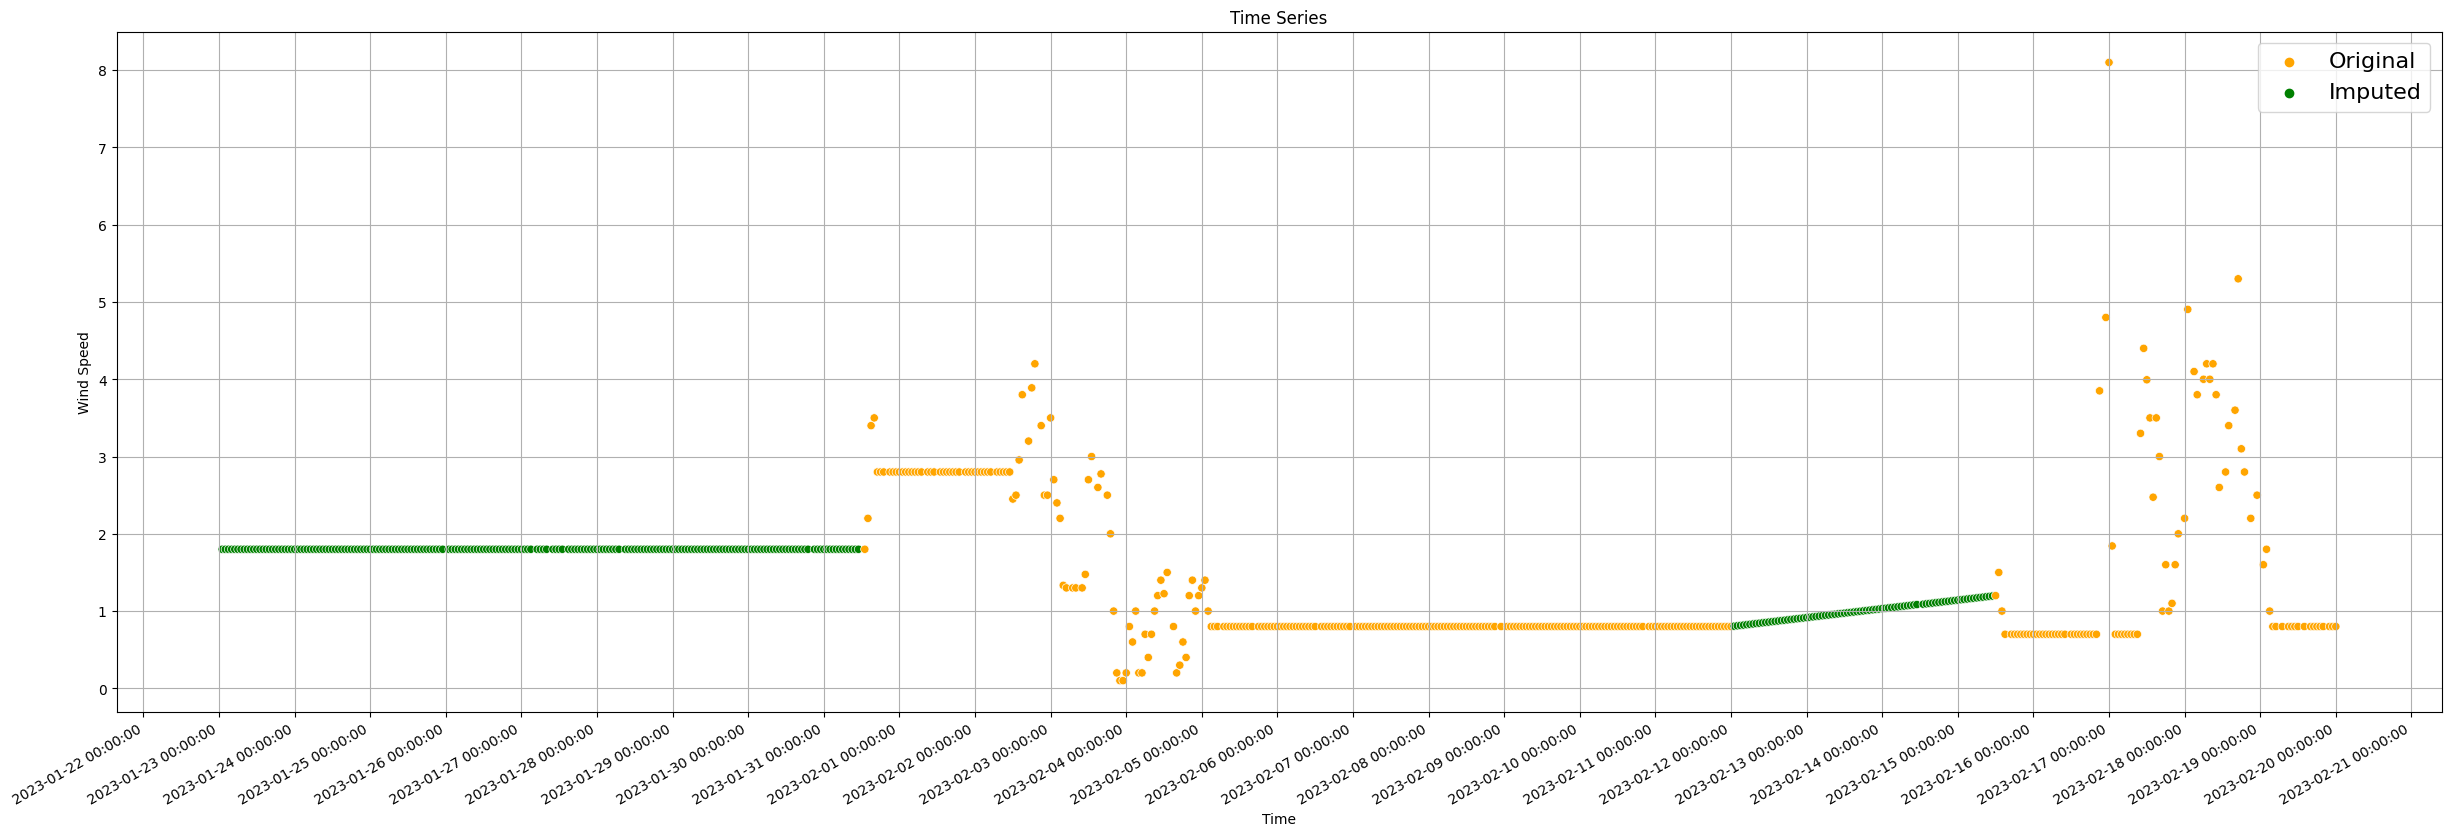

In [31]:
plt.figure(figsize=(30, 10))

# Create the scatter plot with hue for interpolated points
scatter = sns.scatterplot(data=df_oaq, x='time', y='windspeed', hue='is_interpolated', marker='o', palette=['orange', 'green'])

# Formatting the plot
plt.title('Time Series')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.grid(True)

# Handling the legend: changing labels and making it bigger
handles, labels = scatter.get_legend_handles_labels()
labels = ['Original' if label == 'False' else 'Imputed' for label in labels]
scatter.legend(handles=handles, labels=labels, title='', loc='upper right', prop={'size': 16})

# Improve formatting of dates on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate() 

plt.show()

## Correlations

In this section we measure the correlations between the features of both floors and the outdoor features. We have grouped the dataframes for both floors by the day and the hour and have computed the mean statistic for the temperature, humidity, and CO2. Then we have performed a left outer join for both resulting dataframes on the outdoor dataset. We have chosen a left outer join instead of inner join due to the fact that we discovered that there are occasions for the outdoor dataset that values for certain hours are not recorded. For the primary keys of the join we have used the date and the hour. After we mapped the values from the outdoor dataset to the floor ones, we have performed Pearson and Spearman correlations. In general, we have observed that the results from the Spearman correlation are similar to the Pearson correlation results but more distinct. Let's focus on the Spearman correlation matrix and discuss the results:

* In Floor 3 we can see that the indoor temperature does not exhibit a significantly strong correlation to any other feature. It has highest correlation with the windspeed of 0.29. We can also observe that there is a moderately strong correlation of 0.69 of the indoor humidity with the outdoor temperature, meaning that when the outdoor temperature increases then we can expect a monotonic increase in the indoor humidity. 
* In Floor 4 we can observe that the indoor temperature exhibits a moderately strong correlation with the indoor co2 with a correlation of 0.64. In addition, we find it very interesting that the indoor humidity here is very strongly (0.82) correlated with the outdoor temperature. It is interesting to observe in addition that there is no correlation recorded between the outdoor and the indoor temperature.

In [32]:
# Increment the 'time' by 1 hour to match the timeframe defined by the outdoor dataset
df_iaq_floor_3['time_plus_one_hour'] = df_iaq_floor_3['time'] + pd.Timedelta(hours=1)

# Extract the hour and day from the new timestamp
df_iaq_floor_3['hour'] = df_iaq_floor_3['time_plus_one_hour'].dt.hour
min_date = df_iaq_floor_3['time_plus_one_hour'].min()
df_iaq_floor_3['day'] = df_iaq_floor_3['time_plus_one_hour'].dt.dayofyear 

# Increment the 'time' by 1 hour to match the timeframe defined by the outdoor dataset
df_iaq_floor_4['time_plus_one_hour'] = df_iaq_floor_4['time'] + pd.Timedelta(hours=1)

# Extract the hour and day from the new timestamp
df_iaq_floor_4['hour'] = df_iaq_floor_4['time_plus_one_hour'].dt.hour
min_date = df_iaq_floor_4['time_plus_one_hour'].min()
df_iaq_floor_4['day'] = df_iaq_floor_4['time_plus_one_hour'].dt.dayofyear 


df_iaq_floor_3

,temp,humidity,co2,sensor_id,time,floor_index,outlier_temp,outlier_co2,outlier_humidity,time_plus_one_hour,hour,day
1,23.6,23,778.0,ENKZYW001804,2023-01-23 00:00:48+00:00,3,False,False,False,2023-01-23 01:00:48+00:00,1,23
3,23.2,47,449.0,ENKZYW001856,2023-01-23 00:01:33+00:00,3,False,False,False,2023-01-23 01:01:33+00:00,1,23
0,23.5,22,788.0,ENKZYW001792,2023-01-23 00:03:37+00:00,3,False,False,False,2023-01-23 01:03:37+00:00,1,23
6,23.3,24,789.0,ENKZYW001819,2023-01-23 00:03:55+00:00,3,False,False,False,2023-01-23 01:03:55+00:00,1,23
5,23.6,23,796.0,ENKZYW001837,2023-01-23 00:04:18+00:00,3,False,False,False,2023-01-23 01:04:18+00:00,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
102618,23.5,32,434.0,ENKZYW001837,2023-02-19 23:57:05+00:00,3,False,False,False,2023-02-20 00:57:05+00:00,0,51
102616,23.2,32,435.0,ENKZYW001856,2023-02-19 23:57:24+00:00,3,False,False,False,2023-02-20 00:57:24+00:00,0,51
102627,22.0,35,432.0,ENKZYW001882,2023-02-19 23:59:00+00:00,3,False,False,False,2023-02-20 00:59:00+00:00,0,51
102628,23.2,32,428.0,ENKZYW001848,2023-02-19 23:59:00+00:00,3,False,False,False,2023-02-20 00:59:00+00:00,0,51


In [33]:
# Perform the groupby and aggregation
df_iaq_floor_3_mean = df_iaq_floor_3.groupby(['day', 'hour']).agg({
    'temp': 'mean',
    'humidity': 'mean',
    'co2': 'mean'
}).reset_index()

# Rename the columns
df_iaq_floor_3_mean.columns = ['day', 'hour', 'in_temperature', 'in_humidity', 'in_co2']

# Perform the groupby and aggregation
df_iaq_floor_4_mean = df_iaq_floor_4.groupby(['day', 'hour']).agg({
    'temp': 'mean',
    'humidity': 'mean',
    'co2': 'mean'
}).reset_index()

# Rename the columns
df_iaq_floor_4_mean.columns = ['day', 'hour', 'in_temperature', 'in_humidity', 'in_co2']


df_iaq_floor_3_mean 

,day,hour,in_temperature,in_humidity,in_co2
0,23,1,23.142683,26.670732,742.012195
1,23,2,23.000000,26.302632,741.881579
2,23,3,22.925610,26.073171,737.975610
3,23,4,22.892683,25.841463,730.365854
4,23,5,22.842667,25.706667,711.000000
...,...,...,...,...,...
667,50,20,23.547619,31.750000,437.630952
668,50,21,23.439286,32.083333,435.261905
669,50,22,23.342857,32.357143,433.940476
670,50,23,23.244048,32.428571,432.904762


In [34]:
# Merge the dataframes using a left join
df_floor_3_merged = df_iaq_floor_3_mean.merge(df_oaq, on=['day', 'hour'], how='left').copy()
df_floor_4_merged = df_iaq_floor_4_mean.merge(df_oaq, on=['day', 'hour'], how='left').copy()

df_floor_4_merged

,day,hour,in_temperature,in_humidity,in_co2,time,out_temperature,out_humidity,windspeed,is_interpolated
0,23,1,23.525000,24.194444,765.111111,2023-01-23 01:00:00+00:00,-1.3,89.5,1.8,True
1,23,2,23.527273,24.181818,774.015152,2023-01-23 02:00:00+00:00,-1.5,90.0,1.8,True
2,23,3,23.488889,24.055556,776.666667,2023-01-23 03:00:00+00:00,-1.8,90.0,1.8,True
3,23,4,23.505556,23.833333,773.763889,2023-01-23 04:00:00+00:00,-2.2,90.7,1.8,True
4,23,5,23.377273,23.575758,761.651515,2023-01-23 05:00:00+00:00,-2.3,91.0,1.8,True
...,...,...,...,...,...,...,...,...,...,...
667,50,20,22.508333,34.285714,446.464286,2023-02-19 20:00:00+00:00,7.8,83.8,0.8,False
668,50,21,22.525000,34.380952,443.797619,NaT,NaN,NaN,NaN,NaN
669,50,22,22.417857,34.761905,443.416667,2023-02-19 22:00:00+00:00,6.3,87.1,0.8,False
670,50,23,22.384524,34.714286,441.488095,2023-02-19 23:00:00+00:00,5.6,88.0,0.8,False


In [35]:
df_floor_3_merged

,day,hour,in_temperature,in_humidity,in_co2,time,out_temperature,out_humidity,windspeed,is_interpolated
0,23,1,23.142683,26.670732,742.012195,2023-01-23 01:00:00+00:00,-1.3,89.5,1.8,True
1,23,2,23.000000,26.302632,741.881579,2023-01-23 02:00:00+00:00,-1.5,90.0,1.8,True
2,23,3,22.925610,26.073171,737.975610,2023-01-23 03:00:00+00:00,-1.8,90.0,1.8,True
3,23,4,22.892683,25.841463,730.365854,2023-01-23 04:00:00+00:00,-2.2,90.7,1.8,True
4,23,5,22.842667,25.706667,711.000000,2023-01-23 05:00:00+00:00,-2.3,91.0,1.8,True
...,...,...,...,...,...,...,...,...,...,...
667,50,20,23.547619,31.750000,437.630952,2023-02-19 20:00:00+00:00,7.8,83.8,0.8,False
668,50,21,23.439286,32.083333,435.261905,NaT,NaN,NaN,NaN,NaN
669,50,22,23.342857,32.357143,433.940476,2023-02-19 22:00:00+00:00,6.3,87.1,0.8,False
670,50,23,23.244048,32.428571,432.904762,2023-02-19 23:00:00+00:00,5.6,88.0,0.8,False


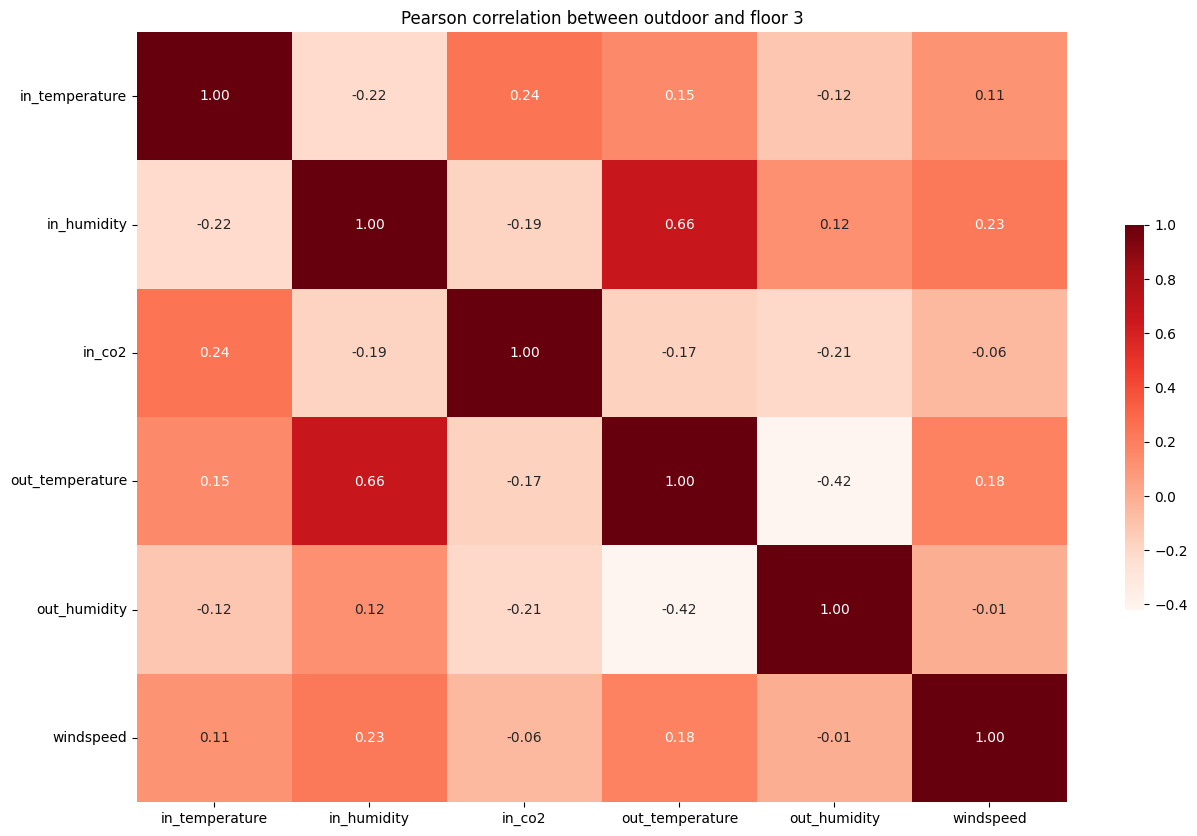

In [36]:
plt.figure(figsize=(15,10))
plt.title('Pearson correlation between outdoor and floor 3')
# Calculate the correlation matrix
corr = df_floor_3_merged[['in_temperature','in_humidity','in_co2','out_temperature','out_humidity','windspeed']].corr()

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Reds", square=False, cbar_kws={"shrink": .5})

# Rotate the x-axis labels to show them horizontally
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

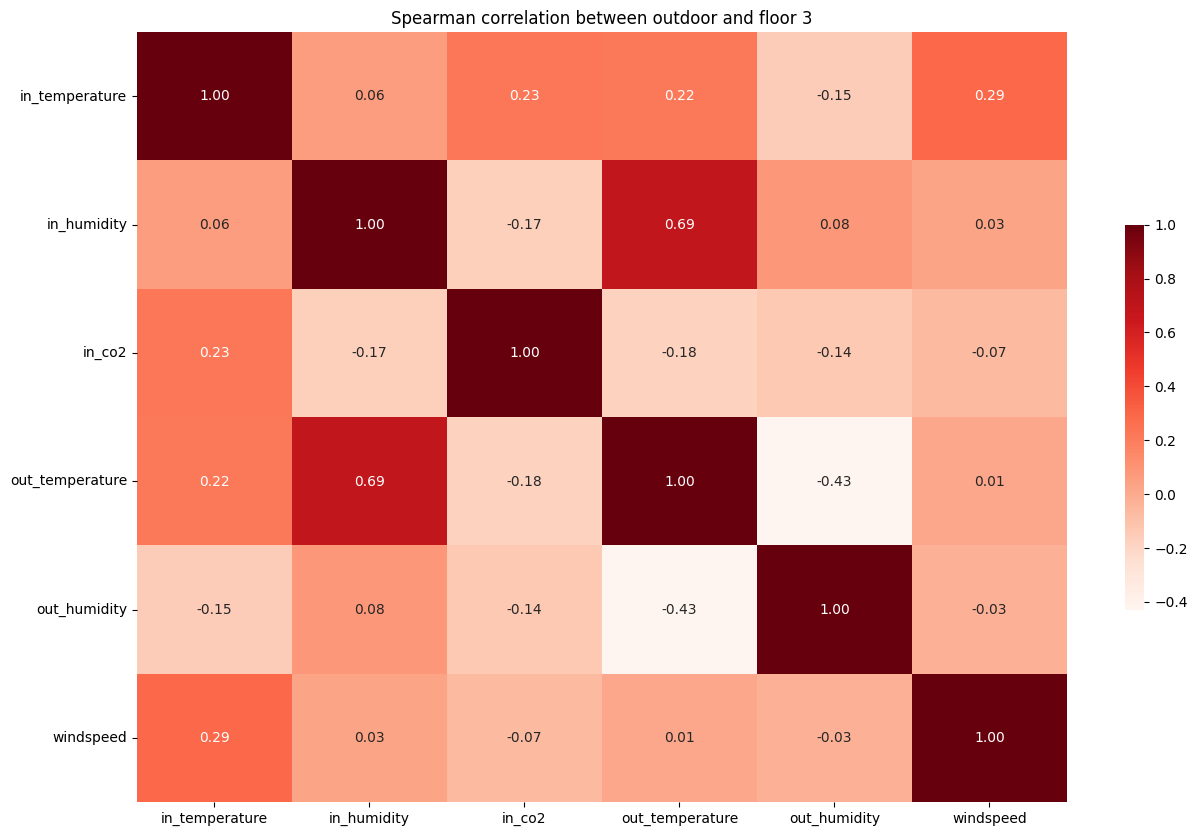

In [37]:
plt.figure(figsize=(15,10))
plt.title('Spearman correlation between outdoor and floor 3')
# Calculate the correlation matri
corr = df_floor_3_merged[['in_temperature','in_humidity','in_co2','out_temperature','out_humidity','windspeed']].corr(method='spearman')

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Reds", square=False, cbar_kws={"shrink": .5})

# Rotate the x-axis labels to show them horizontally
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

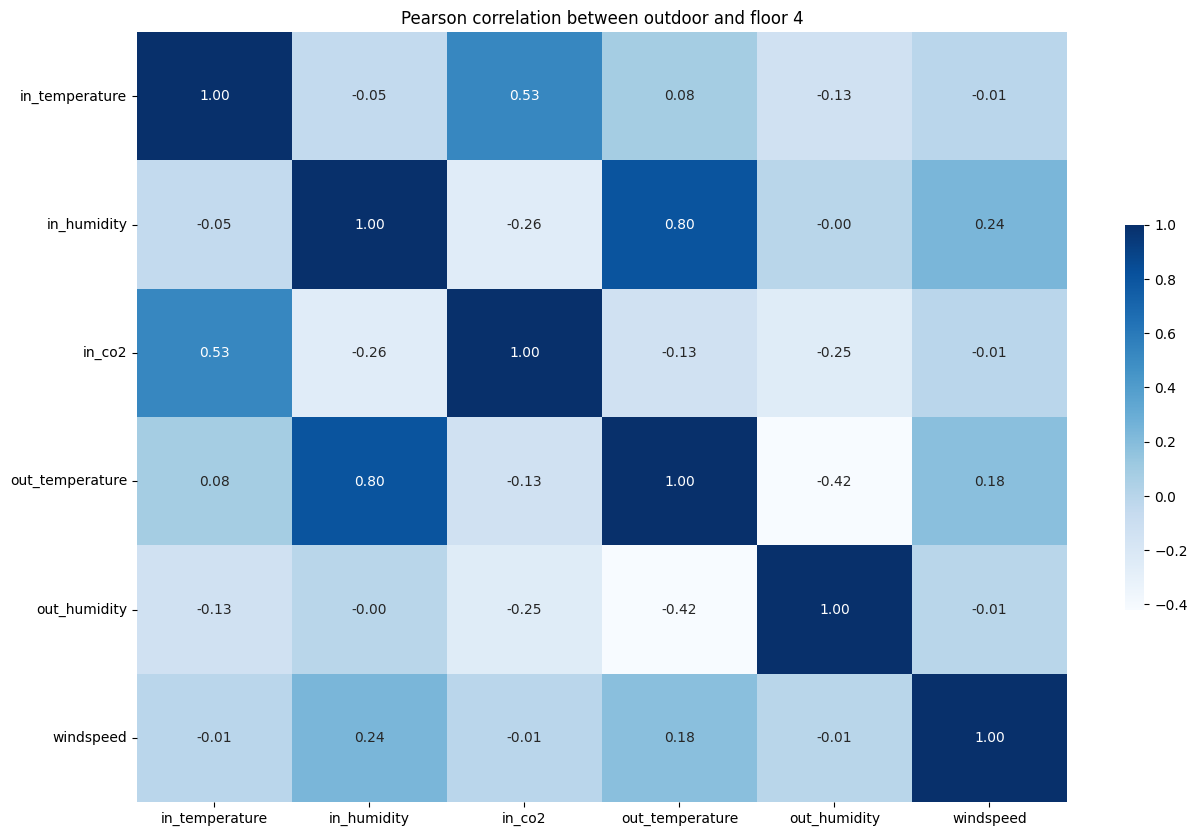

In [38]:
plt.figure(figsize=(15,10))
plt.title('Pearson correlation between outdoor and floor 4')
# Calculate the correlation matrix
corr = df_floor_4_merged[['in_temperature','in_humidity','in_co2','out_temperature','out_humidity','windspeed']].corr()

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", square=False, cbar_kws={"shrink": .5})

# Rotate the x-axis labels to show them horizontally
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

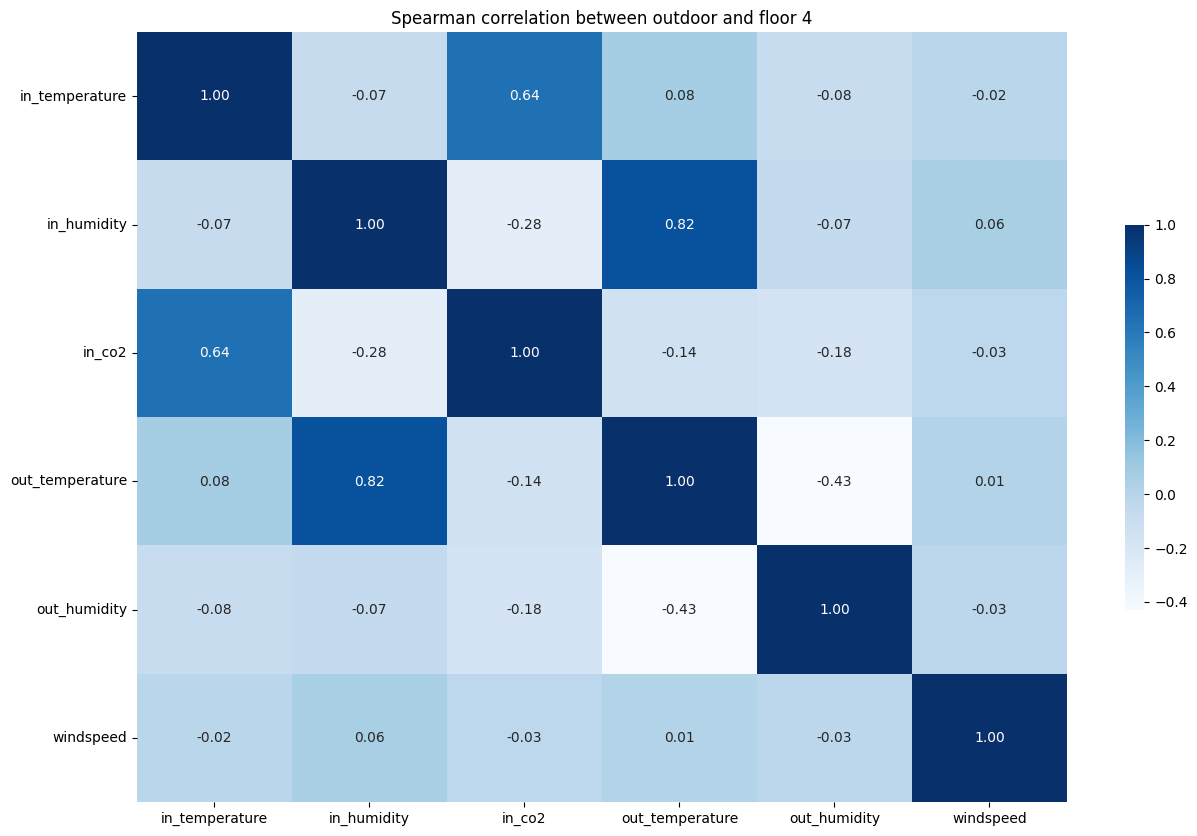

In [39]:
plt.figure(figsize=(15,10))
plt.title('Spearman correlation between outdoor and floor 4')

# Calculate the correlation matrix
corr = df_floor_4_merged[['in_temperature','in_humidity','in_co2','out_temperature','out_humidity','windspeed']].corr(method='spearman')

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", square=False, cbar_kws={"shrink": .5})

# Rotate the x-axis labels to show them horizontally
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

## Distributions

**Discussion**

*Plots*

In this section we have first plotted the distributions of humidity, temperature, and co2 for both floors and temperature, humidity, and windspeed for the outdoor dataset. Next, we have plotted the same features but with respect to time. We have noticed several phenomena:

* We can observe that the CO2 levels for both floors exhibit strong periodic trends. The distinct trends we grasp are that from 00:00 o'clock the CO2 start increasing until reaching a peak then start decreasing again until 00:00 o'clock on the next day. This can potentially be related to the occupation level of the floors. The other graphs (humidity, CO2) for both floors also exhibit to an extent periodic trends where we can see that this periodic phenomena is stronger for floor 4.
* If we take a look at the plot of the Floor 4 humidity and the outdoor temperature we can clearly see that both graphs have very similar monotonic behaviour which also strengthens our belief of their positive relationship.
* We can also observe that there are indeed regions of the CO2 and temperature plots for both floors that go beyond the required boundaries of 20 degrees and 1000 ppm.

*Heatmaps*
To delve deeper into the exhibited periodic behaviour we have created weekly heatmaps that essentially for both floor for each week we compute the average humidity, temperature, co2 for each hour from 1 to 24, across all days in the week. The results show that for all the mentioned features we have an increase in the interval 10:00 am until 18:00 pm, and then lower measurements in the time period outside of this interval. Indeed, it is very clear that the CO2 levels exhibit the strongest periodic pattern.

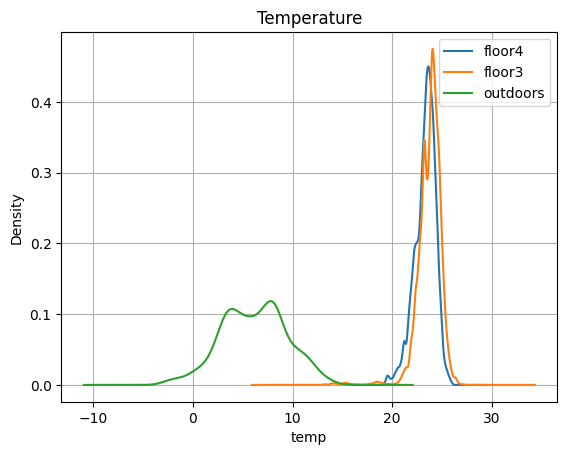

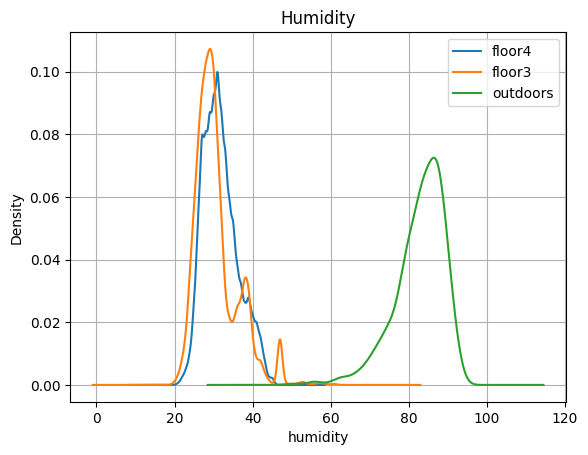

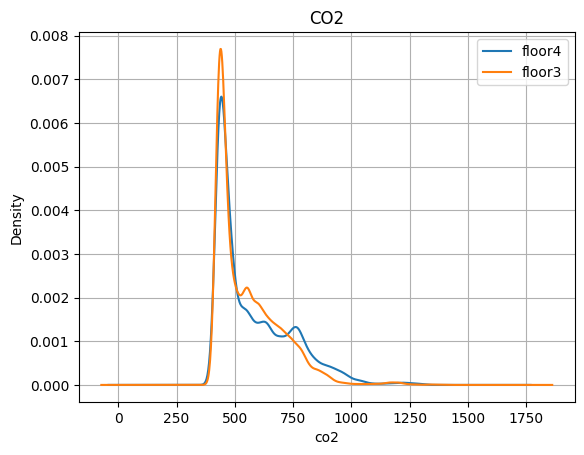

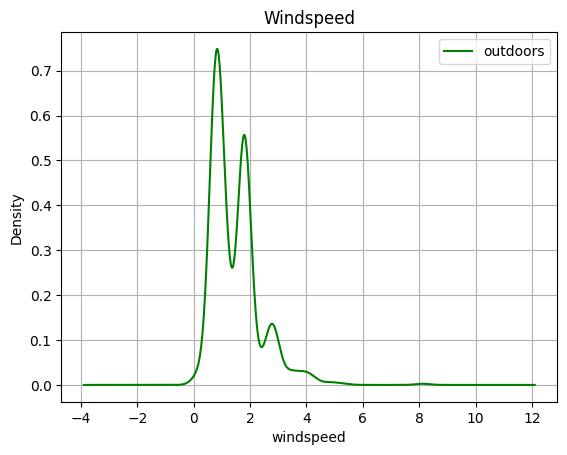

In [40]:
# Plot the distributions for Temperature, Humidity and CO2 for both floors and outdoors
titles = ['Temperature','Humidity','CO2']
for i,stat in enumerate(['temp','humidity','co2']):


    df_iaq_floor_4[stat].plot(kind='kde')
    df_iaq_floor_3[stat].plot(kind='kde')
    if stat =='temp':
        df_oaq['out_temperature'].plot(kind='kde')
    elif stat=='humidity':
       df_oaq['out_humidity'].plot(kind='kde')
    
    plt.title(titles[i])
    plt.xlabel(stat)
    plt.legend(['floor4','floor3','outdoors'])
    plt.grid(True)
    plt.show()


# Plot windspeed
df_oaq['windspeed'].plot(kind='kde',color='green')
plt.title('Windspeed')
plt.xlabel('windspeed')
plt.legend(['outdoors'])
plt.grid(True)
plt.show()

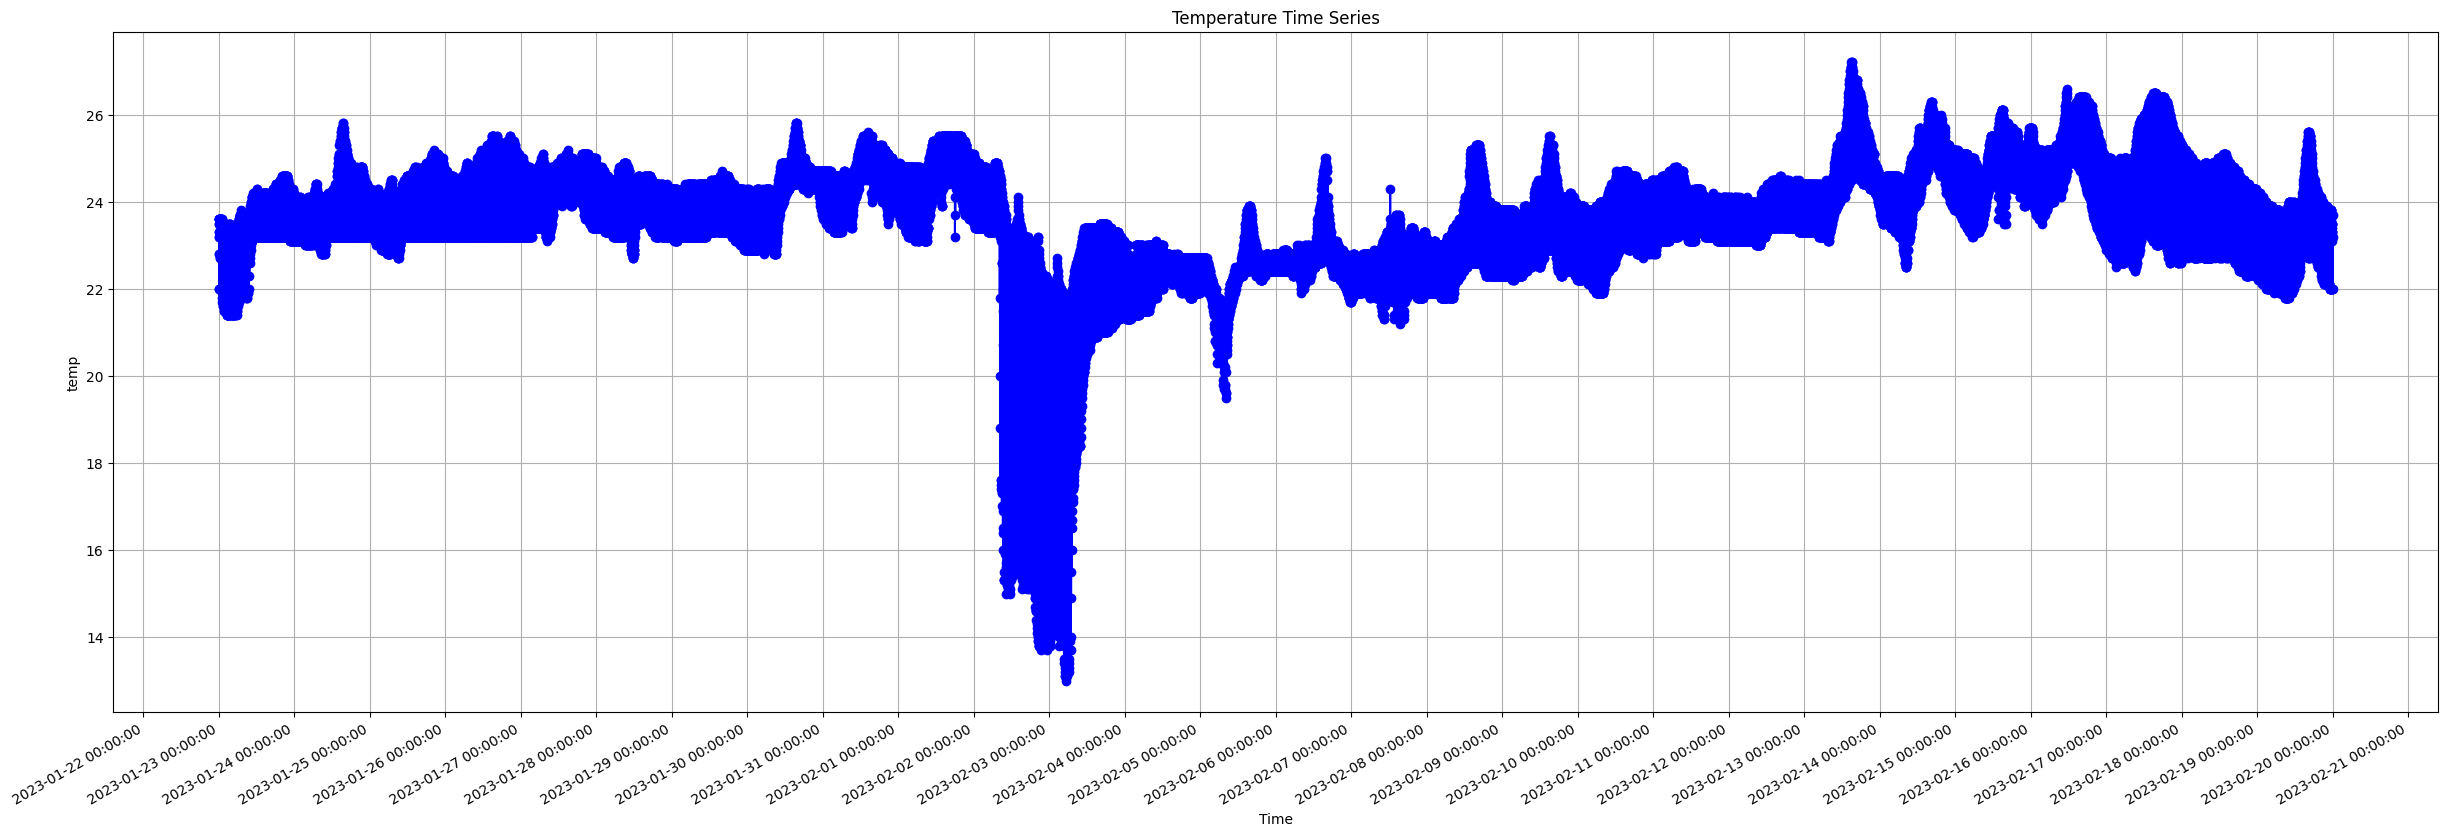

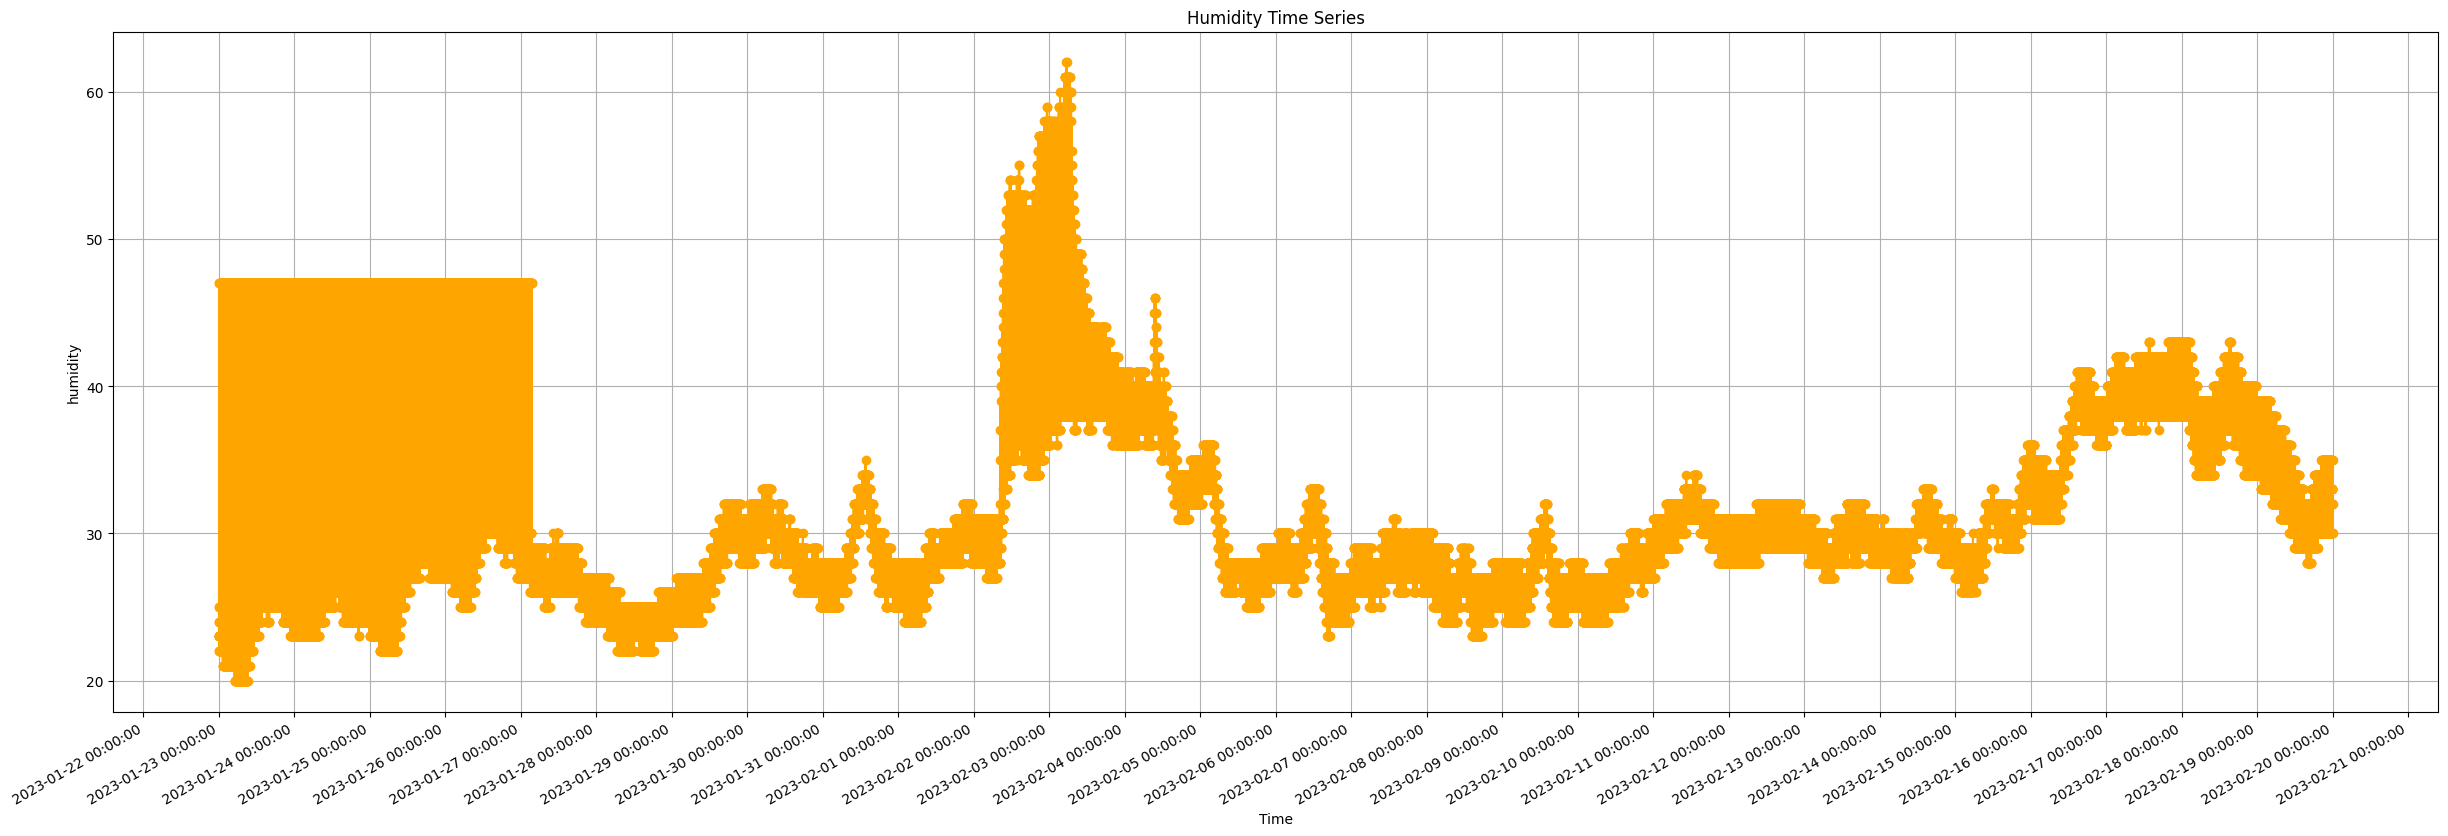

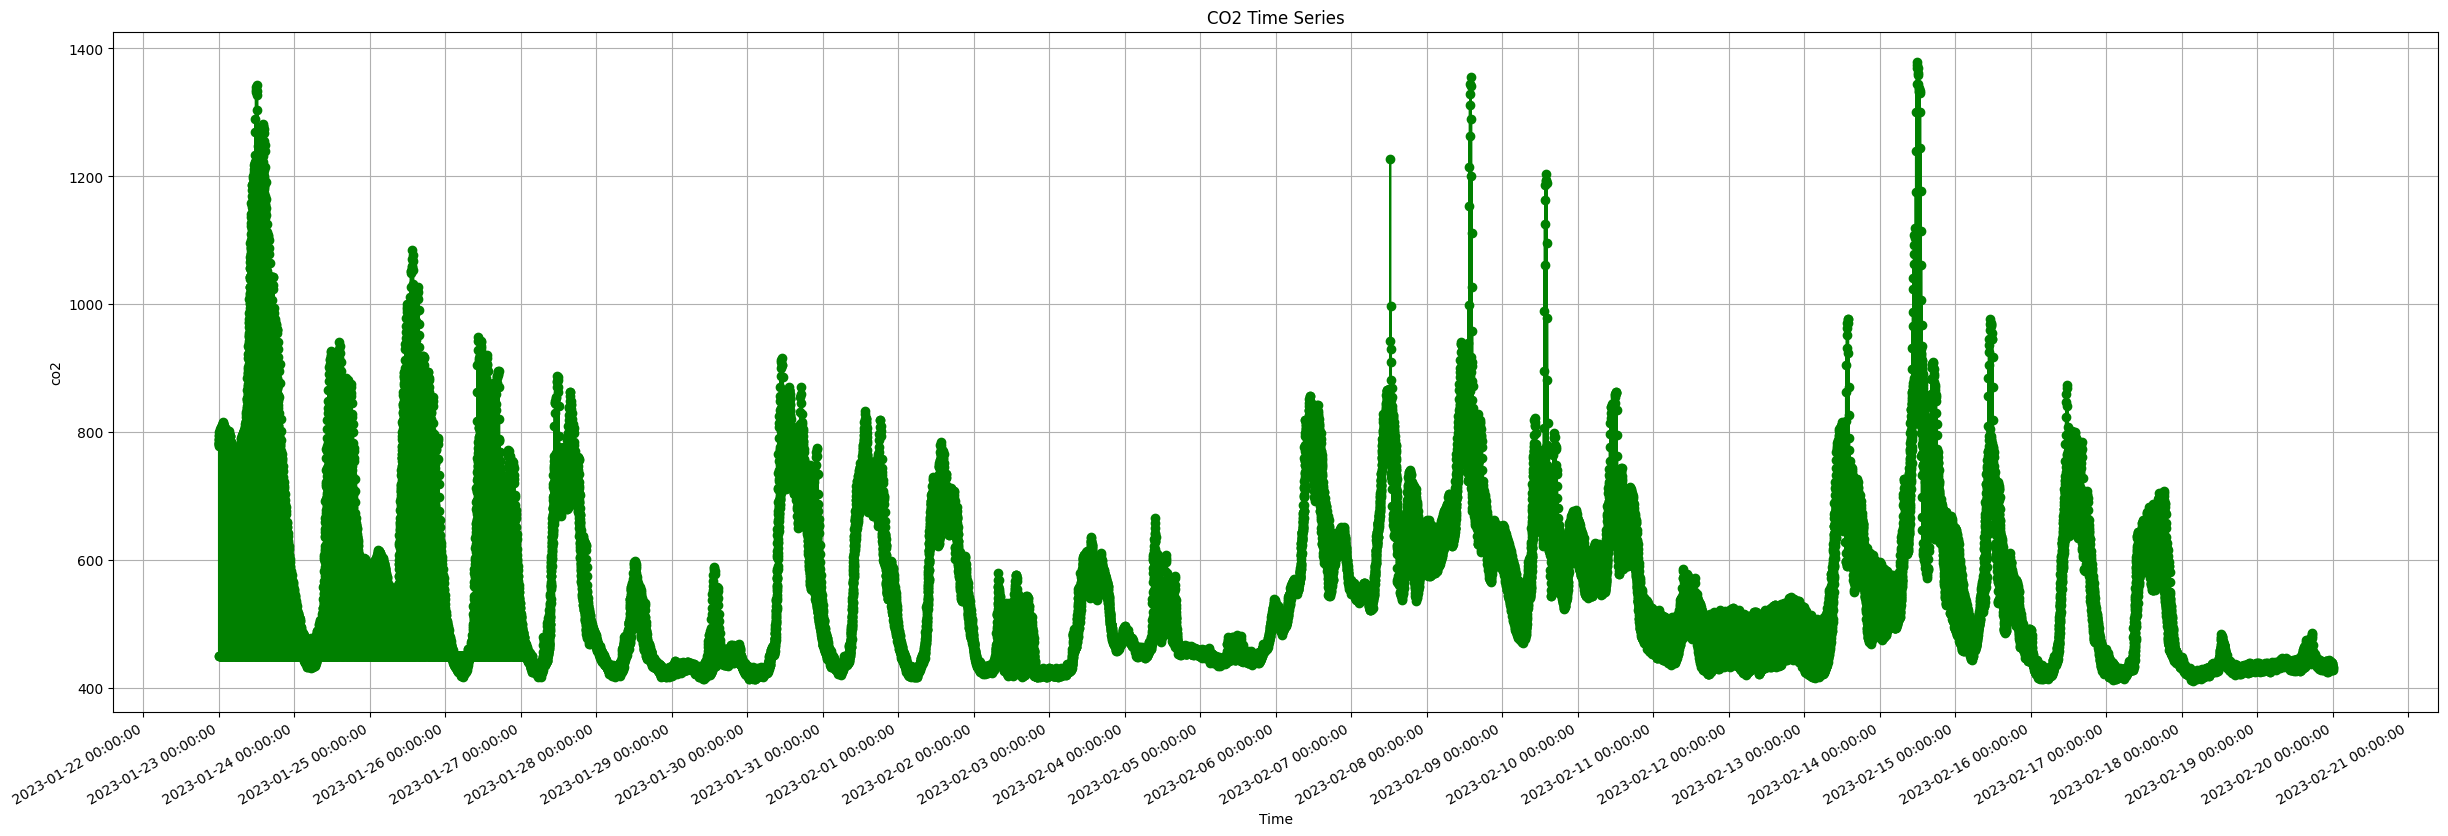

In [41]:
# temperature,humidity and co2 against time plots for floor 3
titles = ['Temperature','Humidity','CO2']
colors = ['blue','orange','green']
for i,stat in enumerate(['temp','humidity','co2']):
    
    # Plotting against time
    plt.figure(figsize=(30, 10))
    plt.plot(df_iaq_floor_3['time'],df_iaq_floor_3[stat],marker='o', linestyle='-',color=colors[i])

    # Formatting the plot
    plt.title(f'{titles[i]} Time Series')
    plt.xlabel('Time')
    plt.ylabel(stat)
    plt.grid(True)

    # Improve formatting of dates on x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gcf().autofmt_xdate()  

    plt.show()

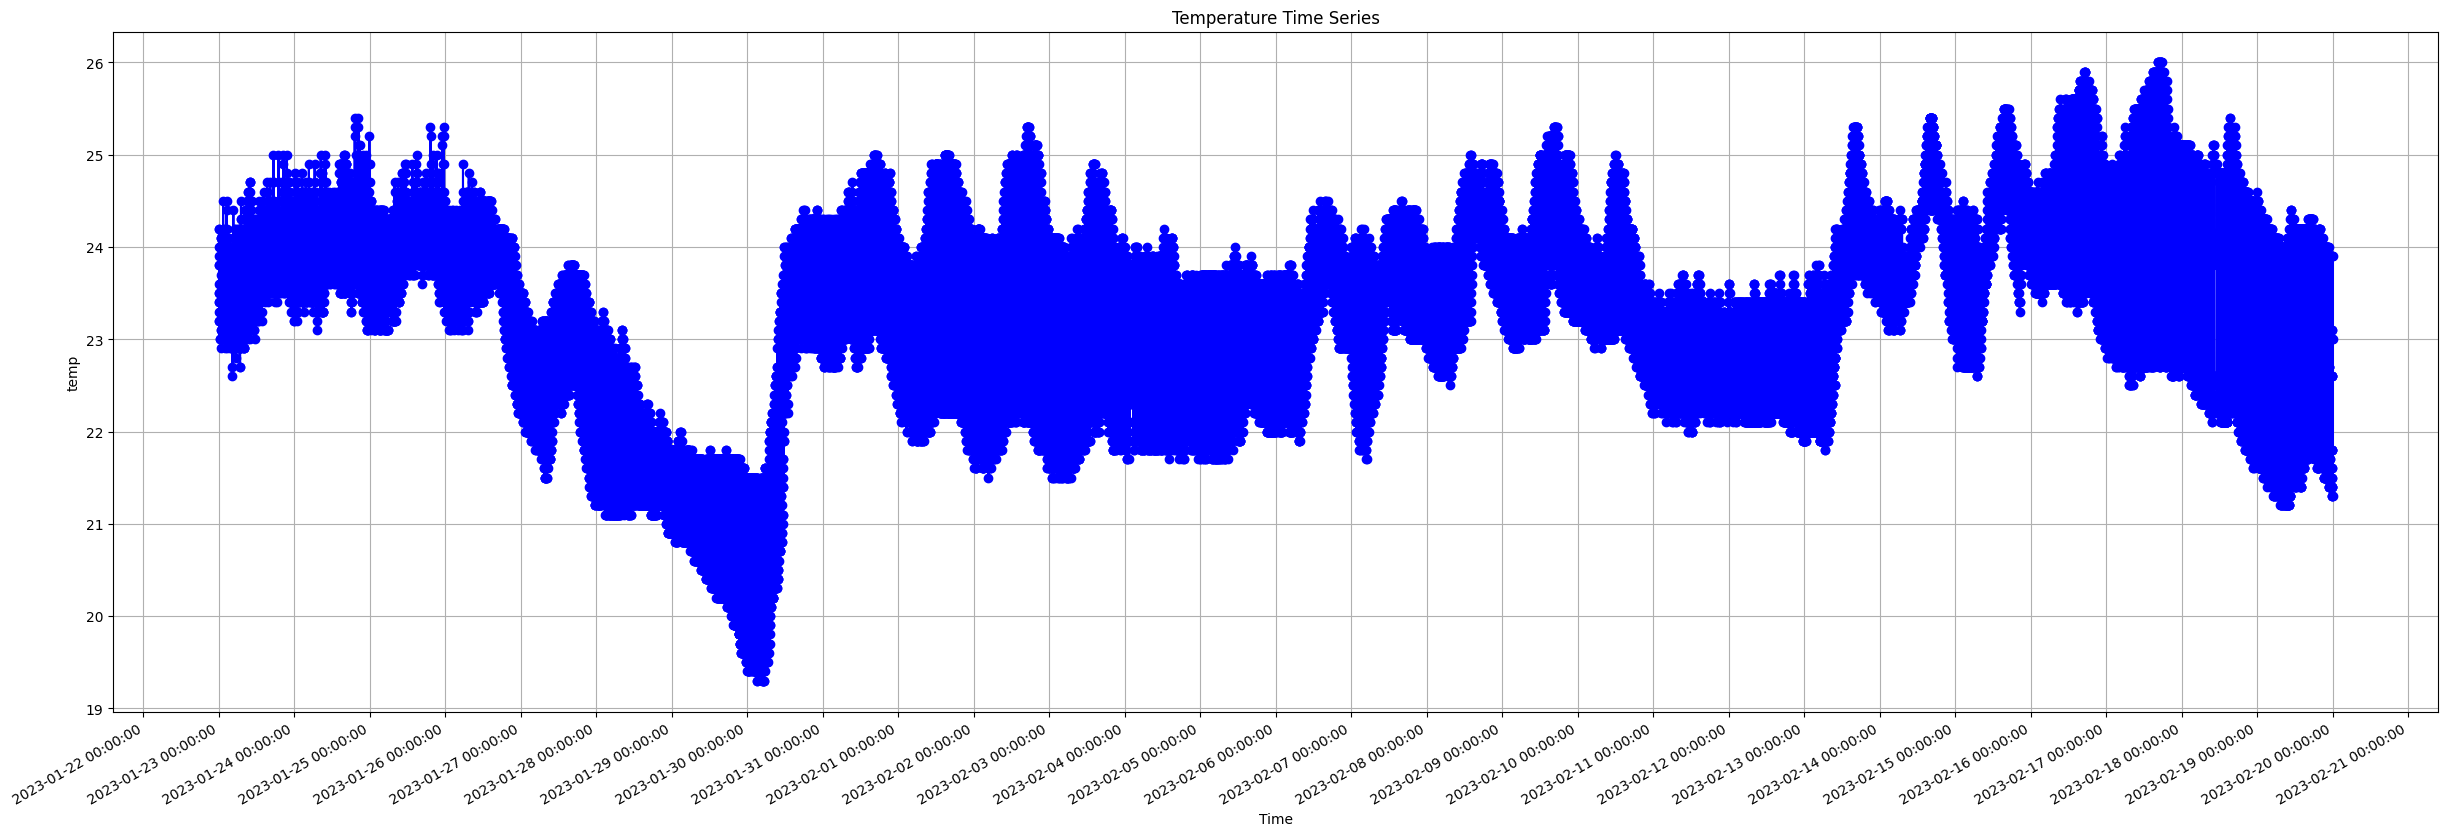

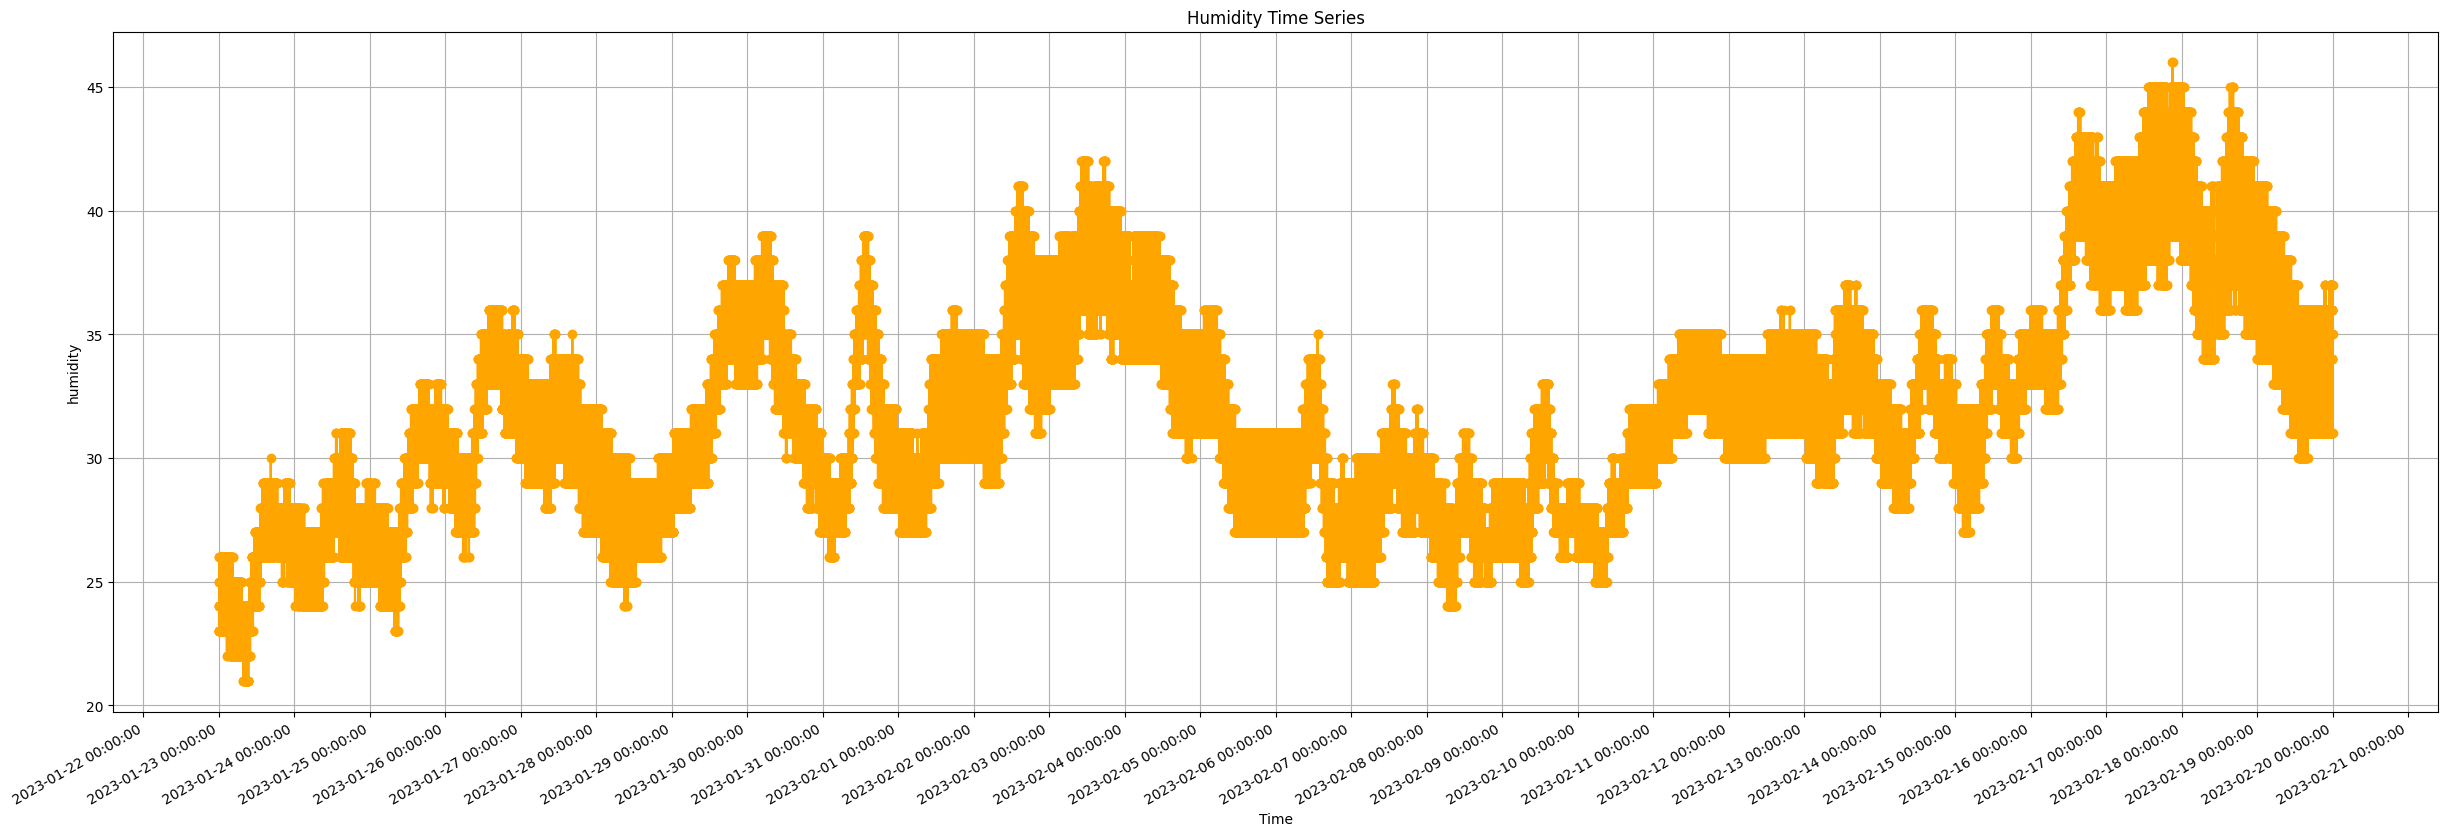

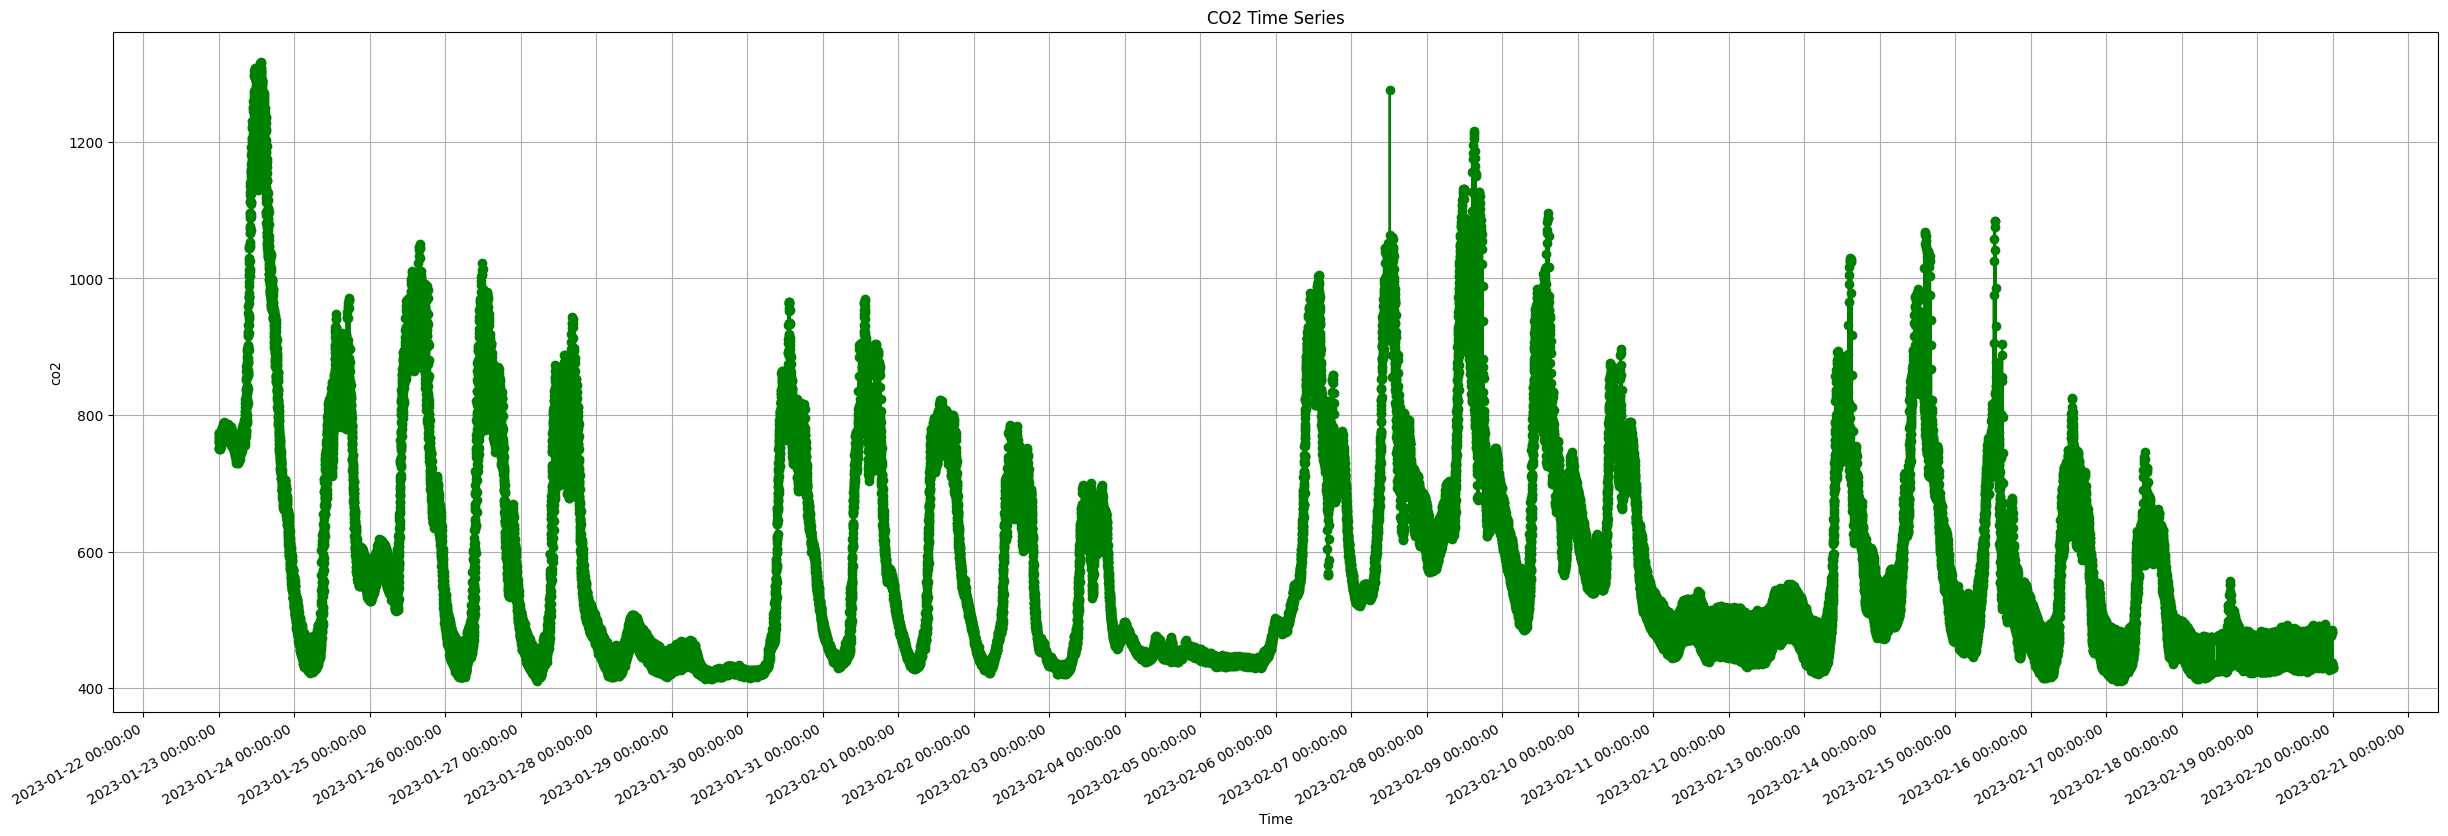

In [42]:
# temperature,humidity and co2 against time plots for floor 3
titles = ['Temperature','Humidity','CO2']
colors = ['blue','orange','green']
for i,stat in enumerate(['temp','humidity','co2']):
    
    # Plotting against time
    plt.figure(figsize=(30, 10))
    plt.plot(df_iaq_floor_4['time'],df_iaq_floor_4[stat],marker='o', linestyle='-',color=colors[i])

    # Formatting the plot
    plt.title(f'{titles[i]} Time Series')
    plt.xlabel('Time')
    plt.ylabel(stat)
    plt.grid(True)

    # Improve formatting of dates on x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gcf().autofmt_xdate()  

    plt.show()

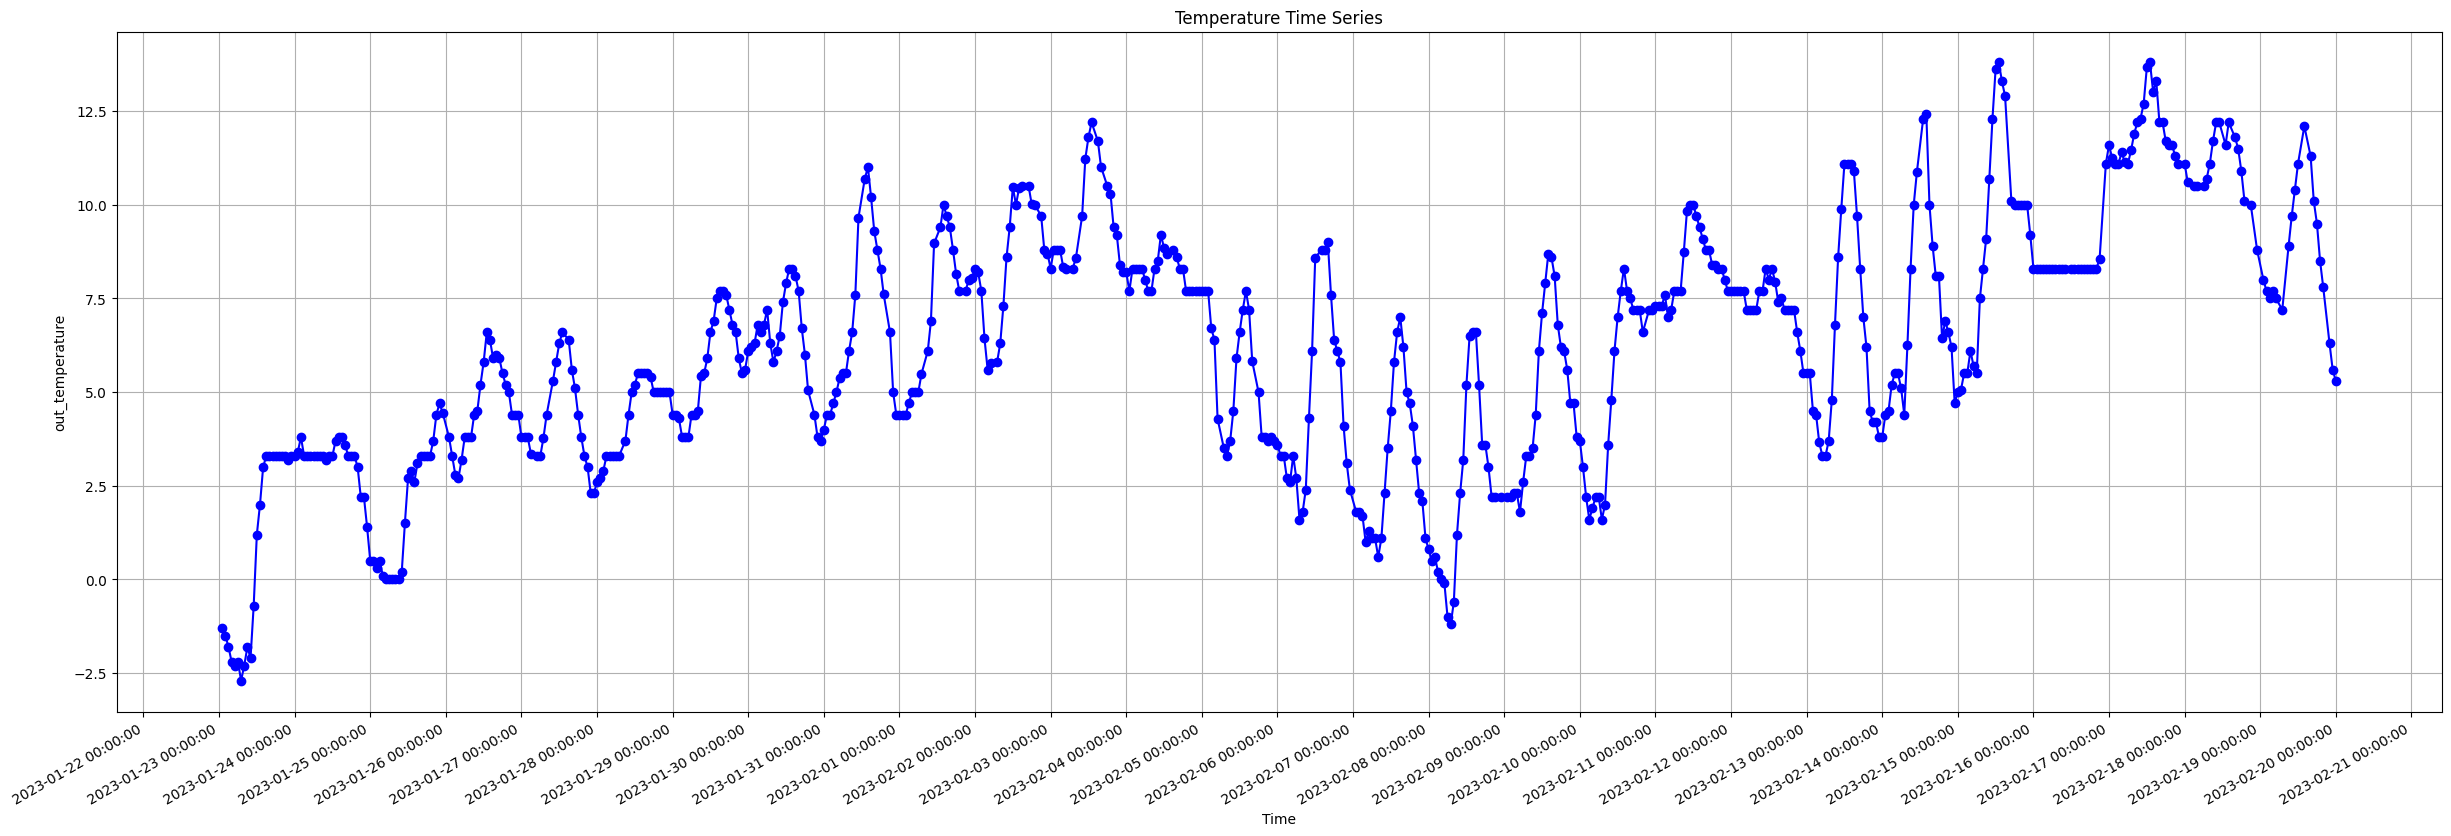

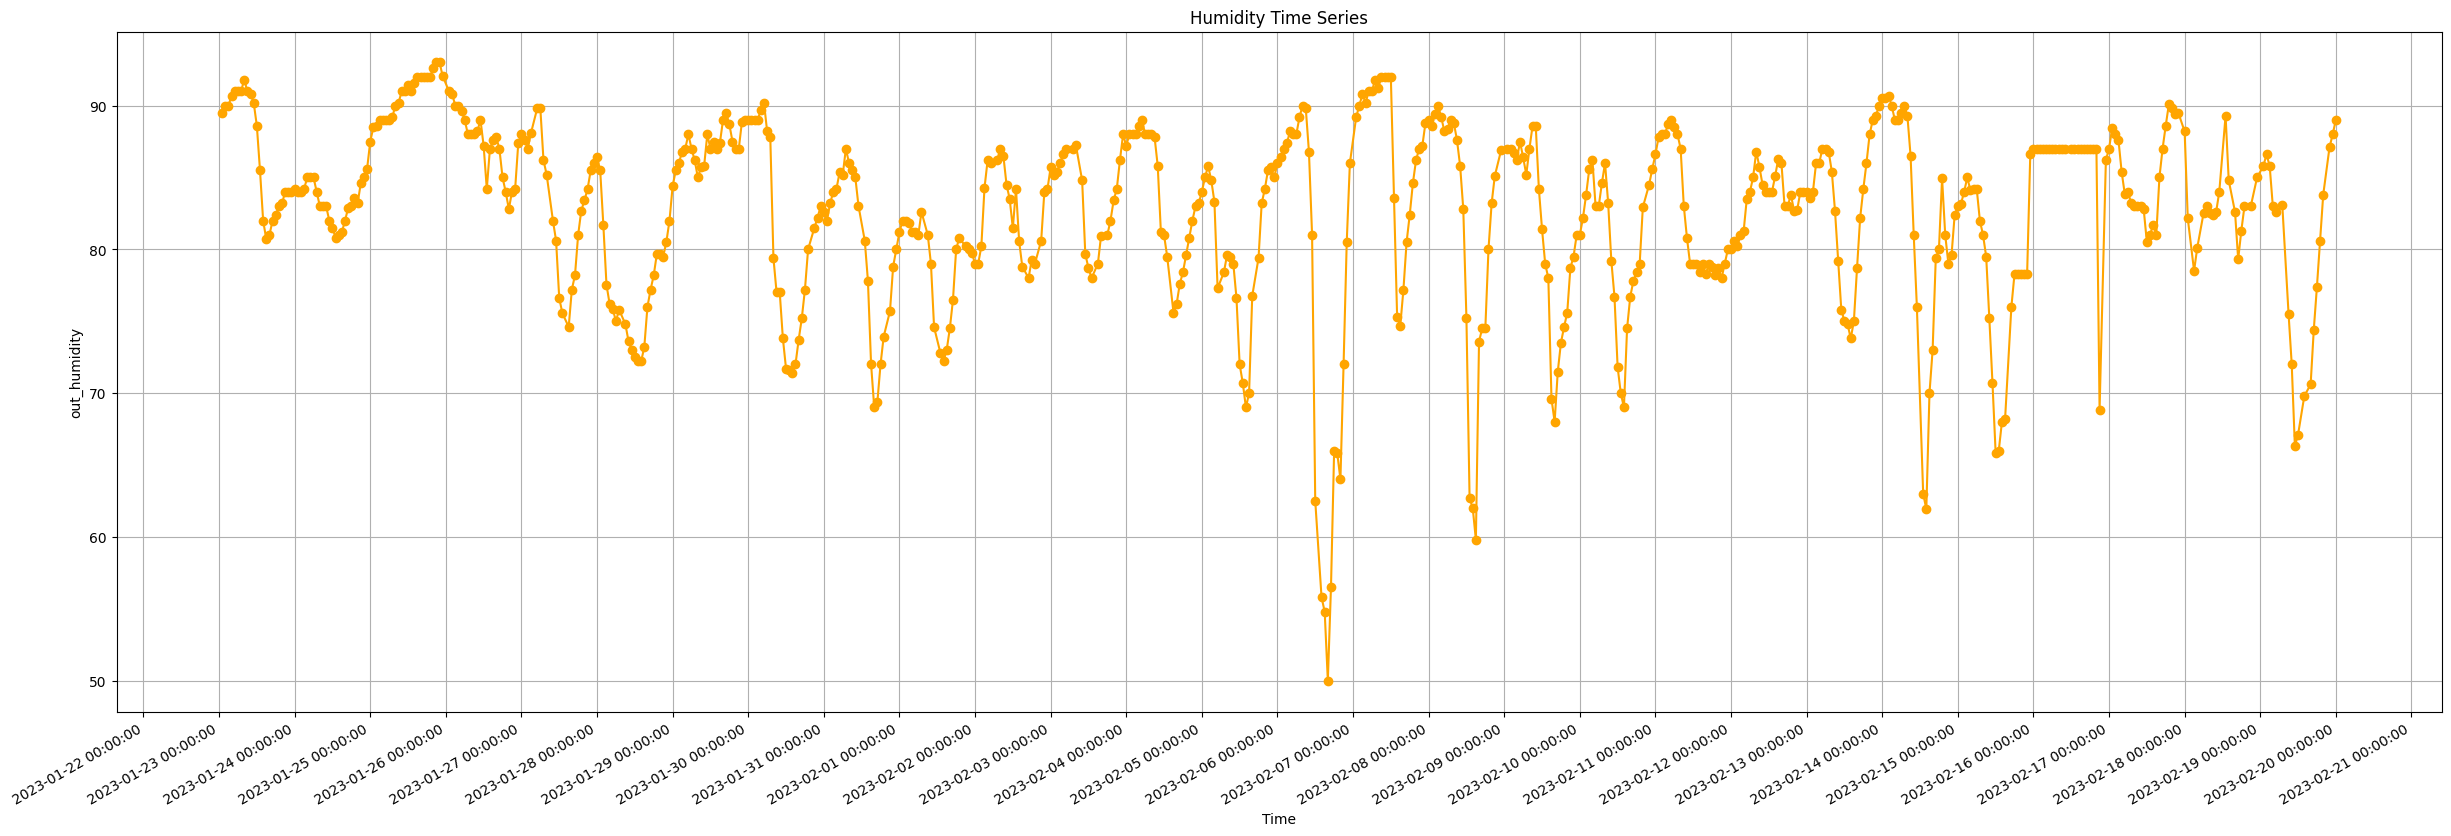

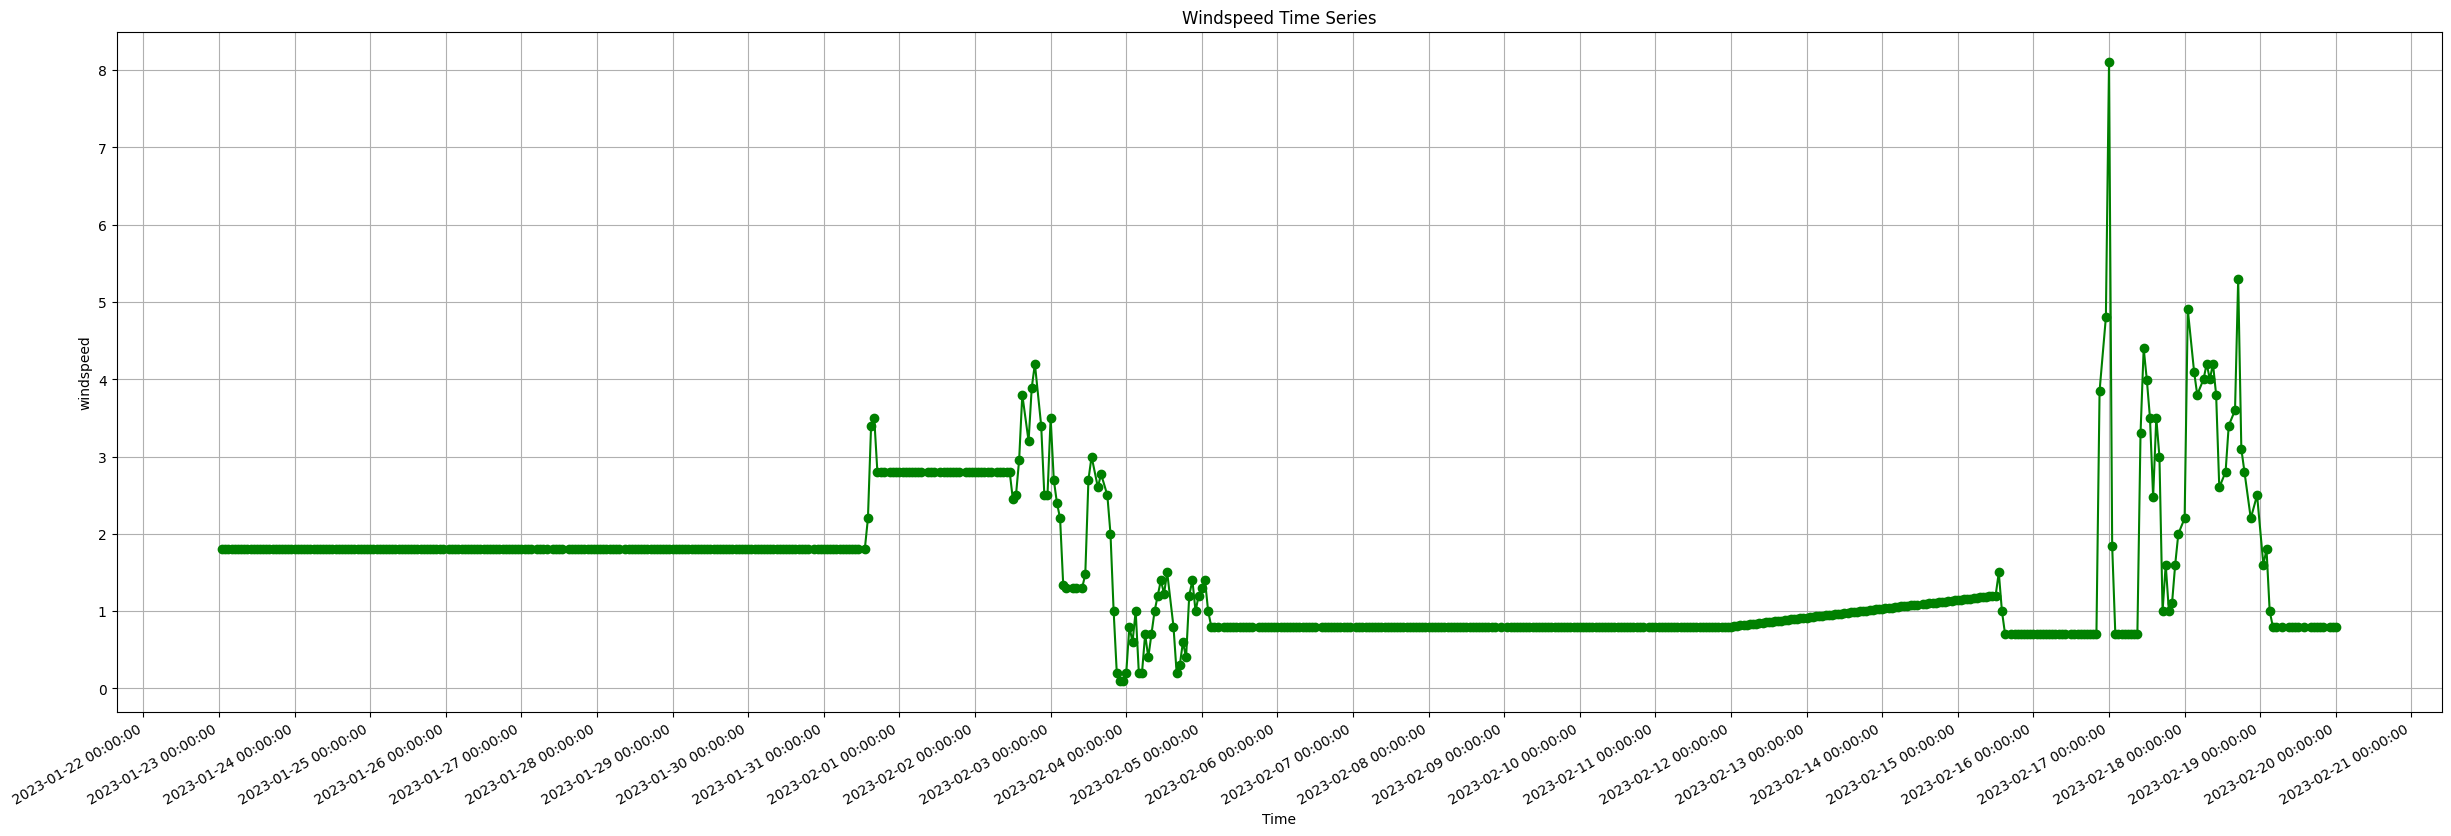

In [43]:
# temperature,humidity and windspeed against time plots for outdoor
titles = ['Temperature','Humidity','Windspeed']
colors = ['blue','orange','green']
for i,stat in enumerate(['out_temperature','out_humidity','windspeed']):
    
    # Plotting against time
    plt.figure(figsize=(30, 10))
    plt.plot(df_oaq['time'],df_oaq[stat],marker='o', linestyle='-',color=colors[i])

    # Formatting the plot
    plt.title(f'{titles[i]} Time Series')
    plt.xlabel('Time')
    plt.ylabel(stat)
    plt.grid(True)

    # Improve formatting of dates on x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gcf().autofmt_xdate() 

    plt.show()


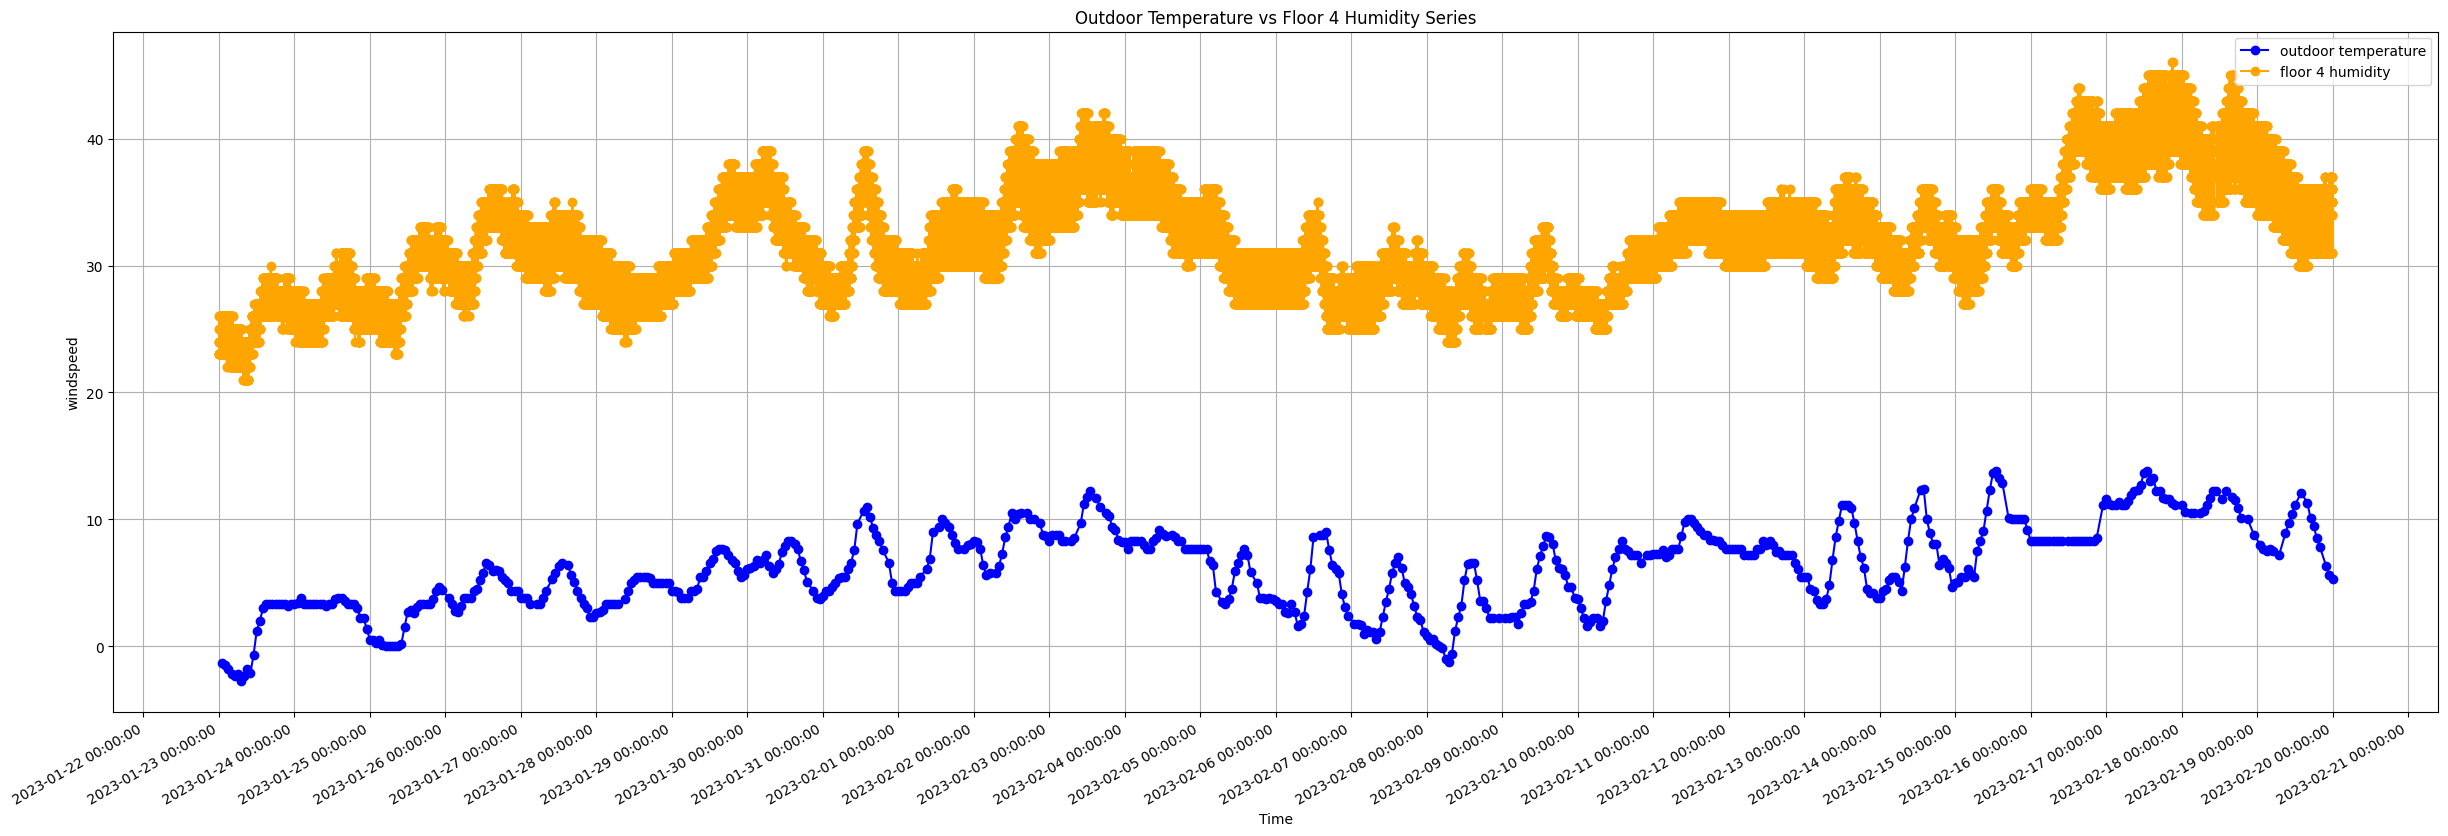

In [44]:
# Plotting against time
plt.figure(figsize=(30, 10))
plt.plot(df_oaq['time'],df_oaq['out_temperature'],marker='o', linestyle='-',color='blue')
plt.plot(df_iaq_floor_4['time'],df_iaq_floor_4['humidity'],marker='o', linestyle='-',color='orange')

# Formatting the plot
plt.title(f'Outdoor Temperature vs Floor 4 Humidity Series')
plt.xlabel('Time')
plt.ylabel(stat)
plt.grid(True)

# Improve formatting of dates on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()  

plt.legend(['outdoor temperature','floor 4 humidity'])

plt.show()

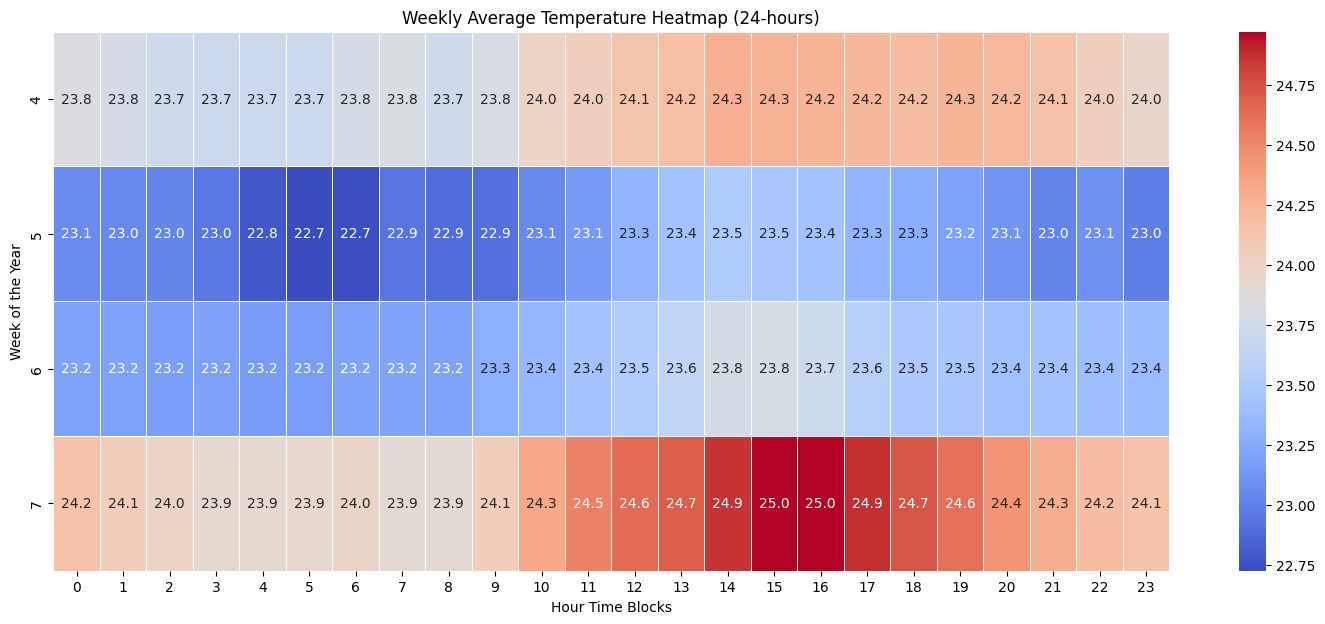

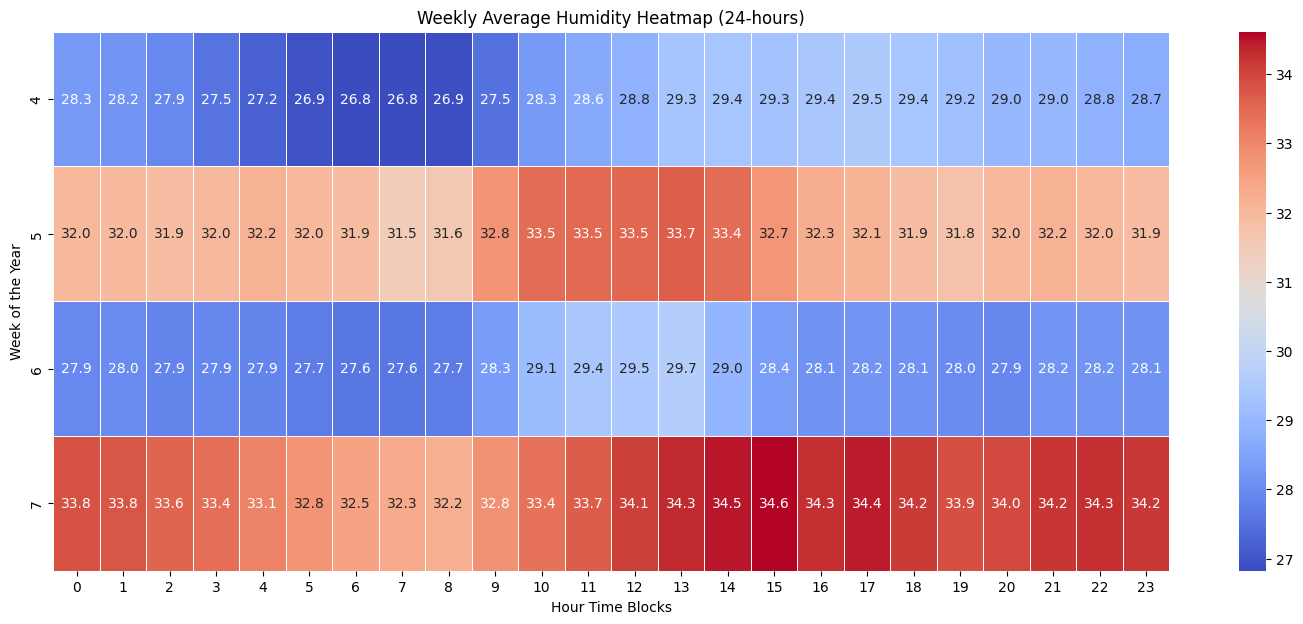

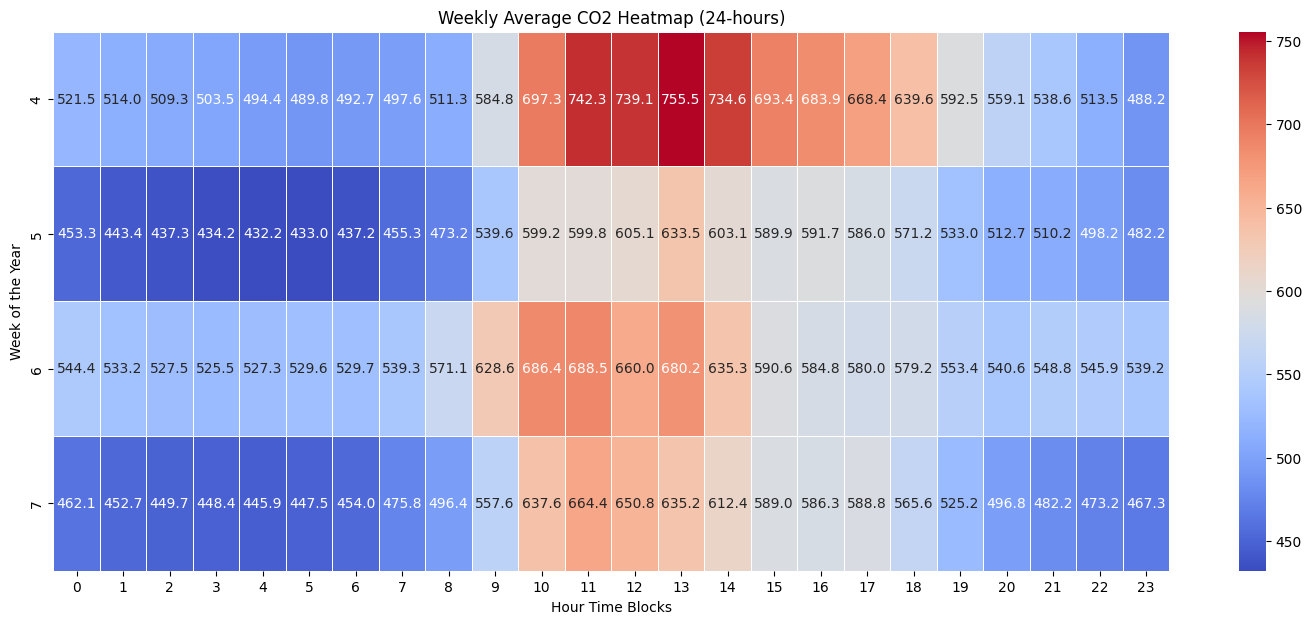

In [45]:
# Plot weekly heatmap for Temperature, Humidity and CO2 for floor 3
titles = ['Temperature','Humidity','CO2']
for i,stat in enumerate(['temp','humidity','co2']):

    df_iaq_floor_3['hour_block'] = df_iaq_floor_3['time'].dt.hour
    df_iaq_floor_3['week'] = df_iaq_floor_3['time'].dt.isocalendar().week
    df_iaq_floor_3['day'] = df_iaq_floor_3['time'].dt.day

    # Group by 'week' and 'hour_block' and calculate the mean 
    grouped = df_iaq_floor_3.groupby(['week', 'hour_block'])[stat].mean().reset_index()

    # Pivot the grouped data
    pivot_table = grouped.pivot('week', 'hour_block', stat)

    # Create the heatmap
    plt.figure(figsize=(18, 7))  
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
    plt.title(f'Weekly Average {titles[i]} Heatmap (24-hours)')
    plt.xlabel('Hour Time Blocks')
    plt.ylabel('Week of the Year')
    plt.show()

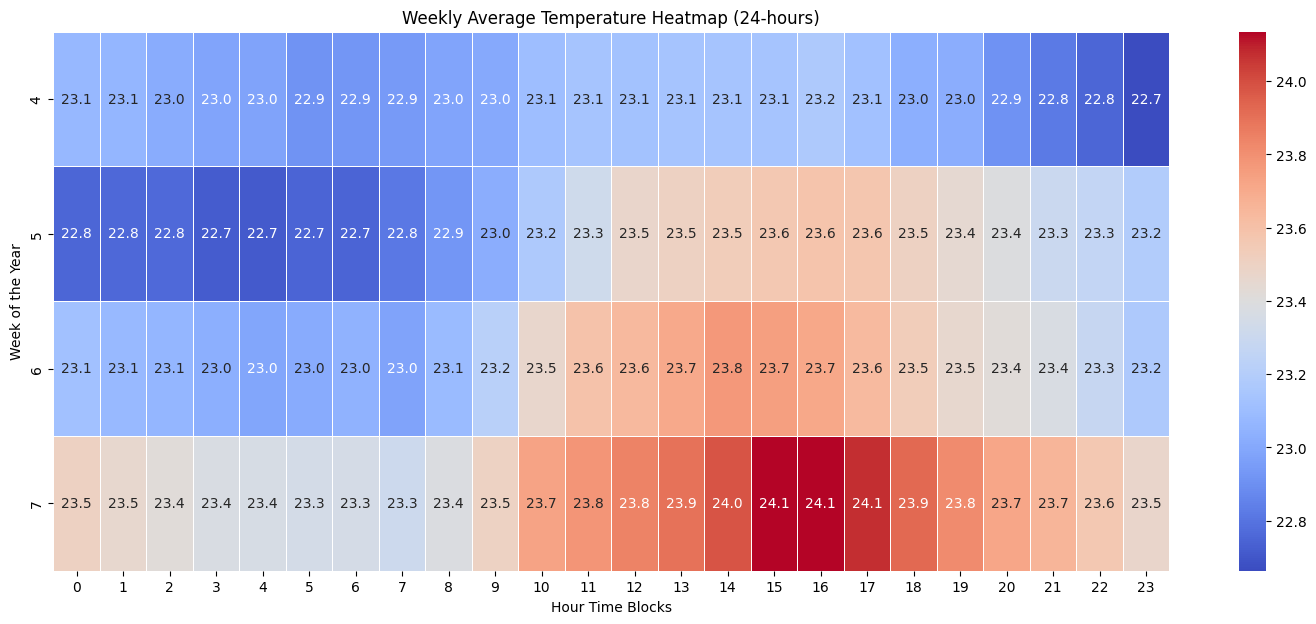

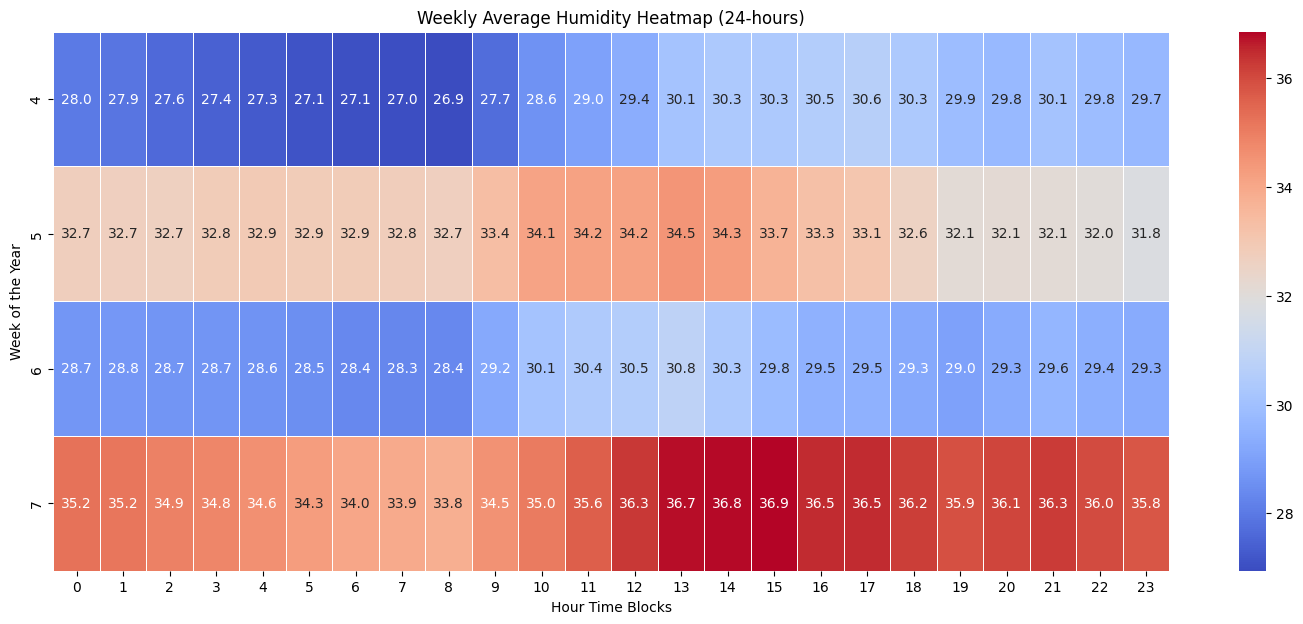

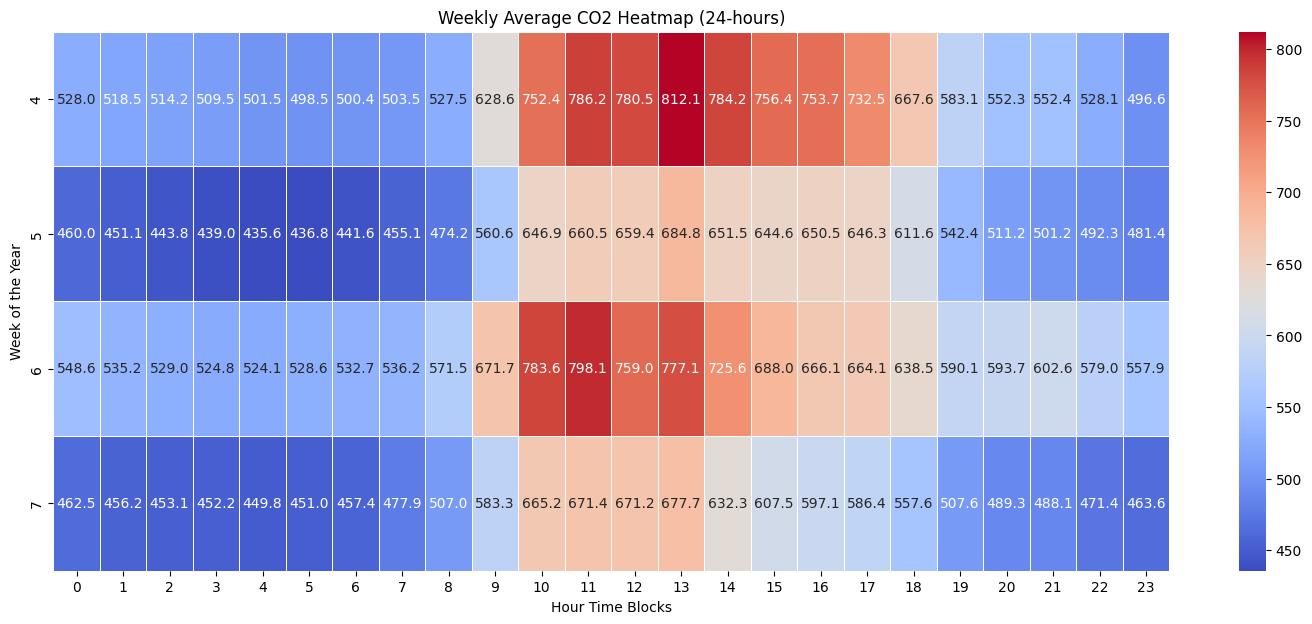

In [46]:
# Plot weekly heatmap for Temperature, Humidity and CO2 for floor 4
titles = ['Temperature','Humidity','CO2']
for i,stat in enumerate(['temp','humidity','co2']):

    df_iaq_floor_4['hour_block'] = df_iaq_floor_4['time'].dt.hour
    df_iaq_floor_4['week'] = df_iaq_floor_4['time'].dt.isocalendar().week
    df_iaq_floor_4['day'] = df_iaq_floor_4['time'].dt.day


    # Group by 'week' and 'hour_block' and calculate the mean
    grouped = df_iaq_floor_4.groupby(['week', 'hour_block'])[stat].mean().reset_index()

    # Pivot the grouped data
    pivot_table = grouped.pivot('week', 'hour_block', stat)

    # Create the heatmap
    plt.figure(figsize=(18, 7)) 
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
    plt.title(f'Weekly Average {titles[i]} Heatmap (24-hours)')
    plt.xlabel('Hour Time Blocks')
    plt.ylabel('Week of the Year')
    plt.show()

# Are there any data in floor 3 and floor 4 that fall outside of the resources range and are not outliers at the same time

**Discussion**

In this section, we find for each floor and each feature (humidity, temperature,co2), the data points that lie outside our required intervals. Then, we group by day and sensor_id, so we can find the total extreme data points for each sensor per day, and we calculate the mean of all these data points per sensor per day. We have also calculated the percent of outliers of these extreme data points. This helps us to better decide whether a sensor might be faulty. In addition, we plot these extreme data points for every feature against the corresponding time, so we visually see whether there are clusters of extreme values. A larger cluster can be a strong indicator of an external event that interfered in our environment. Results:

*Floor 3*
* CO2. There is a large cluster of extreme points on the 23rd of January. We can see that 6 out of the total 7 sensors detected mean CO2 above 1150 per sensor which results in air pollution. Although almost all of these datapoints are considered outlier based on our z-statistics, we believe that it is more likely that the cause is an external interference rather than faulty sensors due to the larger number of sensors showing similar results. Sensor 1886 was the only one to measure high readings of CO2 of on average around 1200 ppm for 3 consecutive days, and then it also measures 31 extreme samples of 1230 ppm on 14 of February. However, all of these readings were outliers based on the z-statistic, thus there might be a possible issue of the sensor regarding measuring CO2 levels.
* Temperature. We can see that there are readings for temperature below 21 degrees on 2nd, 3rd and 5th of February. Even tho the outlier percentage is high, the fact that at least 2 sensors detected similar readings might be an indication of an event that cause local temperature decrease. However, due to the suspiciously low temperatures exhibited by sensor 1882, it might be a good idea to check it.
* Humidity. No discrepancies found here

*Floor 4*
* CO2. We can observe that here for 10 days we had measurements of high CO2. On the 23 of January 6 sensors detected measures averaging above 1160 which noticeably exceeds our permitted interval. Even on the days where only a single sensor measured high levels of CO2, the outlier percentage is small which also reduced the change for having an error in our sensors. Thus, it might be worth checking
* Temperature. On the 29,30,31 of January we have instances of temperatures below 21 degrees. For 30,31 of January, we have multiple sensors displaying with low outlier rate similar results which makes us tend to believe that the results are not due to errors in the sensors. On the 29 of January there is only 1 sensor measuring such temperatures, however it has 0 outlier rate, which also makes us believe that it is not due to an error in the sensor.
* Humidity. No discrepancies found here

In [47]:
df_iaq_floor_3['day'] = df_iaq_floor_3['time'].dt.dayofyear
df_iaq_floor_4['day'] = df_iaq_floor_4['time'].dt.dayofyear 

## Floor 3

In [48]:
# where CO2 is above 1000ppm
co2_above_1000 = df_iaq_floor_3[df_iaq_floor_3['co2'] >1000].copy()
co2_above_1000

,temp,humidity,co2,sensor_id,time,floor_index,outlier_temp,outlier_co2,outlier_humidity,time_plus_one_hour,hour,day,hour_block,week
1441,23.7,22,1008.0,ENKZYW001837,2023-01-23 09:39:18+00:00,3,False,True,False,2023-01-23 10:39:18+00:00,10,23,9,4
1453,23.7,22,1027.0,ENKZYW001837,2023-01-23 09:44:18+00:00,3,False,True,False,2023-01-23 10:44:18+00:00,10,23,9,4
1467,23.7,23,1016.0,ENKZYW001819,2023-01-23 09:48:55+00:00,3,False,True,False,2023-01-23 10:48:55+00:00,10,23,9,4
1466,23.8,22,1043.0,ENKZYW001837,2023-01-23 09:49:18+00:00,3,False,True,False,2023-01-23 10:49:18+00:00,10,23,9,4
1465,23.1,23,1017.0,ENKZYW001848,2023-01-23 09:49:30+00:00,3,False,True,False,2023-01-23 10:49:30+00:00,10,23,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80910,25.7,32,1244.0,ENKZYW001856,2023-02-14 12:57:18+00:00,3,False,True,False,2023-02-14 13:57:18+00:00,13,45,12,7
80924,25.6,31,1177.0,ENKZYW001856,2023-02-14 13:02:18+00:00,3,False,True,False,2023-02-14 14:02:18+00:00,14,45,13,7
80938,25.6,31,1115.0,ENKZYW001856,2023-02-14 13:07:18+00:00,3,False,True,False,2023-02-14 14:07:18+00:00,14,45,13,7
80952,25.5,31,1061.0,ENKZYW001856,2023-02-14 13:12:18+00:00,3,False,True,False,2023-02-14 14:12:18+00:00,14,45,13,7


In [49]:
# First aggregation with sum, count, and percent for out_co2
sensor_stats = co2_above_1000.groupby(['day','sensor_id'])['outlier_co2'].agg(
    total_samples='count',
    total_outliers='sum',
    outliers_percent=lambda x: x.sum() / x.count()
)

# Second groupby to calculate the mean of co2
mean_co2 = co2_above_1000.groupby(['day','sensor_id'])['co2'].agg(
    mean_co2='mean',
    min_co2='min',
    max_co2='max'
)

# Join the mean_co2 series with the original sensor_stats dataframe
sensor_stats = sensor_stats.join(mean_co2)

sensor_stats


total_samples  total_outliers  outliers_percent  \
day sensor_id                                                       
23  ENKZYW001792             63              63               1.0   
    ENKZYW001804             63              63               1.0   
    ENKZYW001819             66              66               1.0   
    ENKZYW001837             65              65               1.0   
    ENKZYW001848             63              63               1.0   
    ENKZYW001882             72              72               1.0   
25  ENKZYW001882             19              19               1.0   
38  ENKZYW001856              1               1               1.0   
39  ENKZYW001856             12              12               1.0   
40  ENKZYW001856              9               9               1.0   
45  ENKZYW001856             31              31               1.0   

                     mean_co2  min_co2  max_co2  
day sensor_id                                    
23  ENKZYW001792  1140.460317   1007.0   1211.0  
    ENKZYW001804  1139.269841   1001.0   1214.0  
    ENKZYW001819  1164.121212   1010.0   1247.0  
    ENKZYW001837  1183.261538   1008.0   1274.0  
    ENKZYW001848  1154.000000   1017.0   1238.0  
    ENKZYW001882  1177.250000   1001.0   1342.0  
25  ENKZYW001882  1041.736842   1008.0   1085.0  
38  ENKZYW001856  1227.000000   1227.0   1227.0  
39  ENKZYW001856  1244.750000   1026.0   1355.0  
40  ENKZYW001856  1156.666667   1061.0   1204.0  
45  ENKZYW001856  1230.677419   1007.0   1378.0

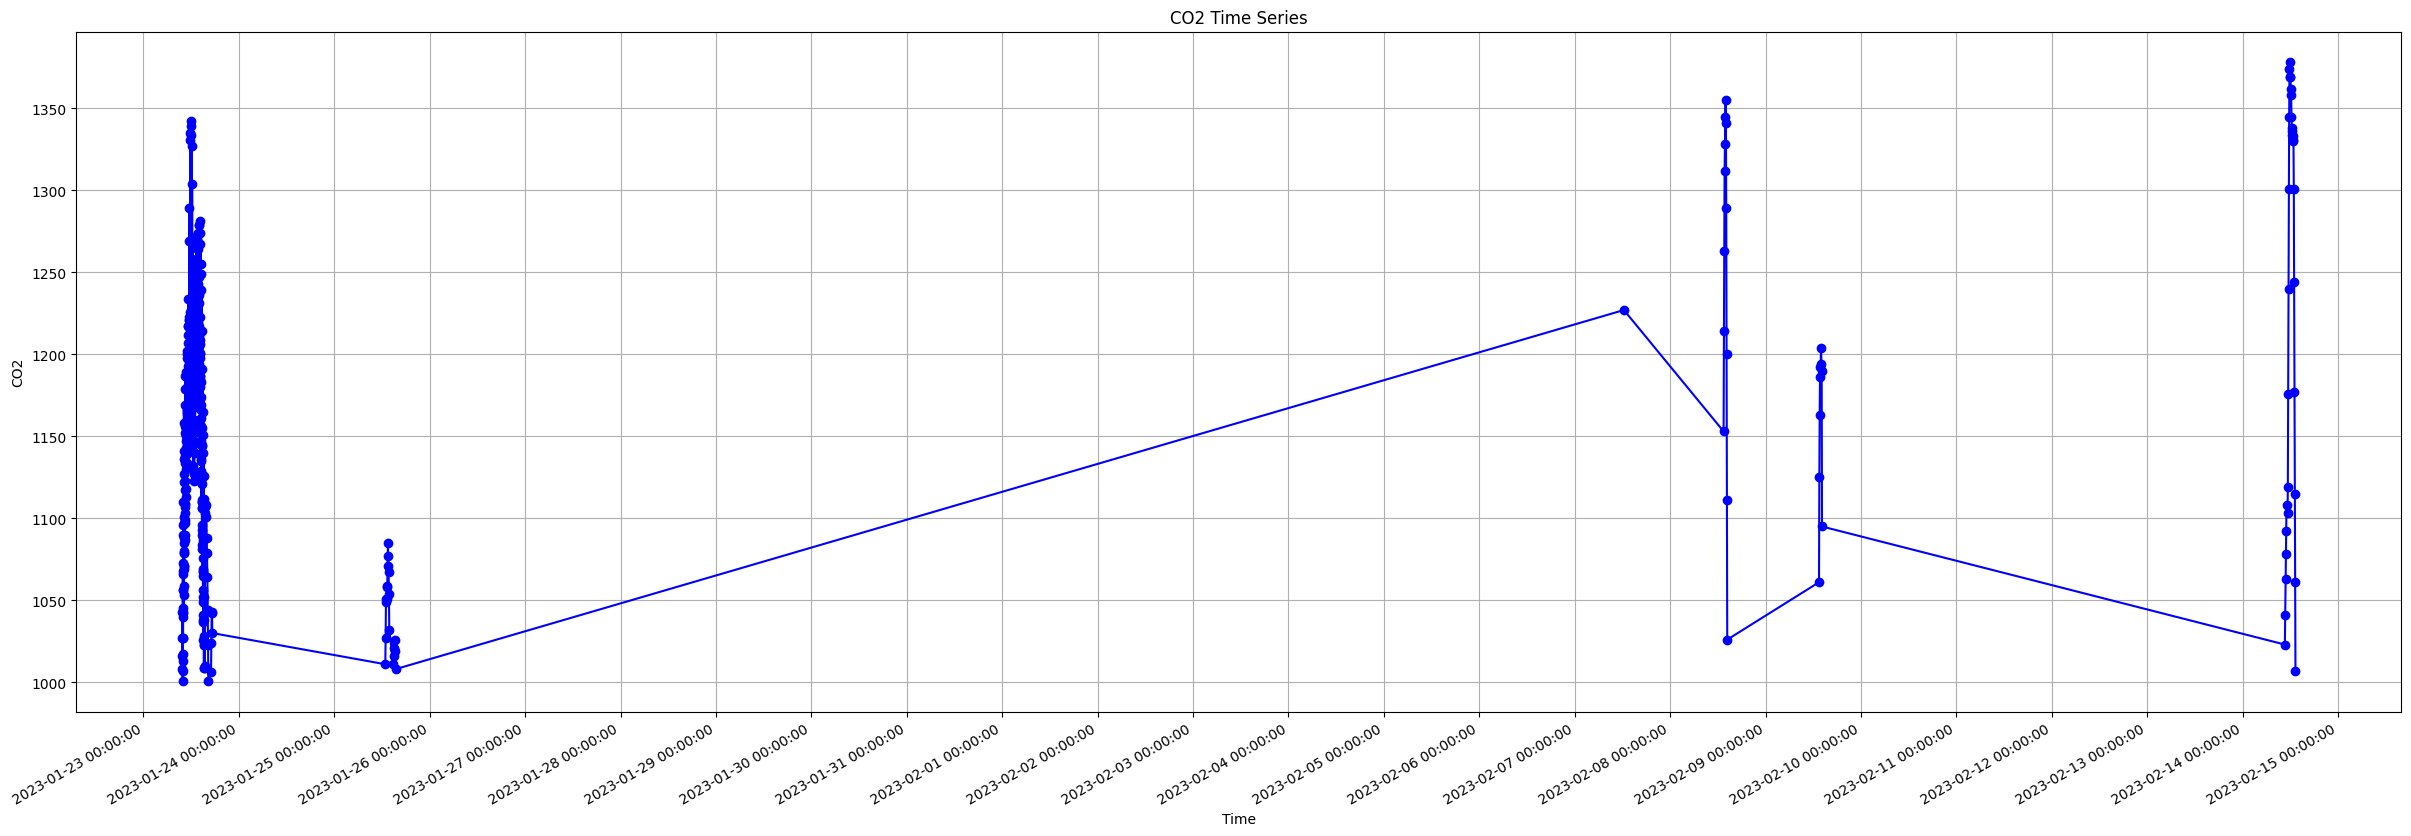

In [50]:
# Plotting against time
plt.figure(figsize=(30, 10))
plt.plot(co2_above_1000 ['time'],co2_above_1000 ['co2'],marker='o', linestyle='-',color=colors[0])

# Formatting the plot
plt.title(f'CO2 Time Series')
plt.xlabel('Time')
plt.ylabel('CO2')
plt.grid(True)

# Improve formatting of dates on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()  



In [51]:
# where temp is below 21 
temp_below_21 = df_iaq_floor_3[df_iaq_floor_3['temp'] <21].copy()
temp_below_21 

,temp,humidity,co2,sensor_id,time,floor_index,outlier_temp,outlier_co2,outlier_humidity,time_plus_one_hour,hour,day,hour_block,week
36347,20.0,35,454.0,ENKZYW001882,2023-02-02 08:20:02+00:00,3,True,False,False,2023-02-02 09:20:02+00:00,9,33,8,5
36359,18.8,37,451.0,ENKZYW001882,2023-02-02 08:25:02+00:00,3,True,False,False,2023-02-02 09:25:02+00:00,9,33,8,5
36371,17.6,39,446.0,ENKZYW001882,2023-02-02 08:30:02+00:00,3,True,False,False,2023-02-02 09:30:02+00:00,9,33,8,5
36383,17.6,40,443.0,ENKZYW001882,2023-02-02 08:35:02+00:00,3,True,False,False,2023-02-02 09:35:02+00:00,9,33,8,5
36395,17.5,40,436.0,ENKZYW001882,2023-02-02 08:40:02+00:00,3,True,False,False,2023-02-02 09:40:02+00:00,9,33,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46408,20.9,29,450.0,ENKZYW001819,2023-02-05 08:25:50+00:00,3,False,False,False,2023-02-05 09:25:50+00:00,9,36,8,5
46407,20.6,28,443.0,ENKZYW001837,2023-02-05 08:27:40+00:00,3,False,False,False,2023-02-05 09:27:40+00:00,9,36,8,5
46405,20.9,28,453.0,ENKZYW001882,2023-02-05 08:28:35+00:00,3,False,False,False,2023-02-05 09:28:35+00:00,9,36,8,5
46418,20.7,28,442.0,ENKZYW001837,2023-02-05 08:32:40+00:00,3,False,False,False,2023-02-05 09:32:40+00:00,9,36,8,5


In [52]:
# First aggregation with sum, count, and percent for temperature
sensor_stats = temp_below_21.groupby(['day','sensor_id'])['outlier_temp'].agg(
    total_samples='count',
    total_outliers='sum',
    outliers_percent=lambda x: x.sum() / x.count()
)

# Second groupby to calculate the mean of temperature
mean_temp = temp_below_21.groupby(['day','sensor_id'])['temp'].agg(
    mean_temp='mean',
    min_temp='min',
    max_temp='max'
)

# Join the mean_temp series with the original sensor_stats dataframe
sensor_stats = sensor_stats.join(mean_temp)

sensor_stats

total_samples  total_outliers  outliers_percent  mean_temp  \
day sensor_id                                                                  
33  ENKZYW001792            173             171          0.988439  18.667052   
    ENKZYW001882            185             185          1.000000  15.279459   
34  ENKZYW001792            116              87          0.750000  19.068103   
    ENKZYW001848             25               0          0.000000  20.896000   
    ENKZYW001882            168             129          0.767857  16.764286   
36  ENKZYW001819             13               0          0.000000  20.792308   
    ENKZYW001837             42               9          0.214286  20.421429   
    ENKZYW001848             20               0          0.000000  20.720000   
    ENKZYW001882             11               0          0.000000  20.818182   

                  min_temp  max_temp  
day sensor_id                         
33  ENKZYW001792      17.4      20.7  
    ENKZYW001882      13.7      20.0  
34  ENKZYW001792      17.5      20.9  
    ENKZYW001848      20.8      20.9  
    ENKZYW001882      13.0      20.9  
36  ENKZYW001819      20.6      20.9  
    ENKZYW001837      19.5      20.9  
    ENKZYW001848      20.5      20.9  
    ENKZYW001882      20.7      20.9

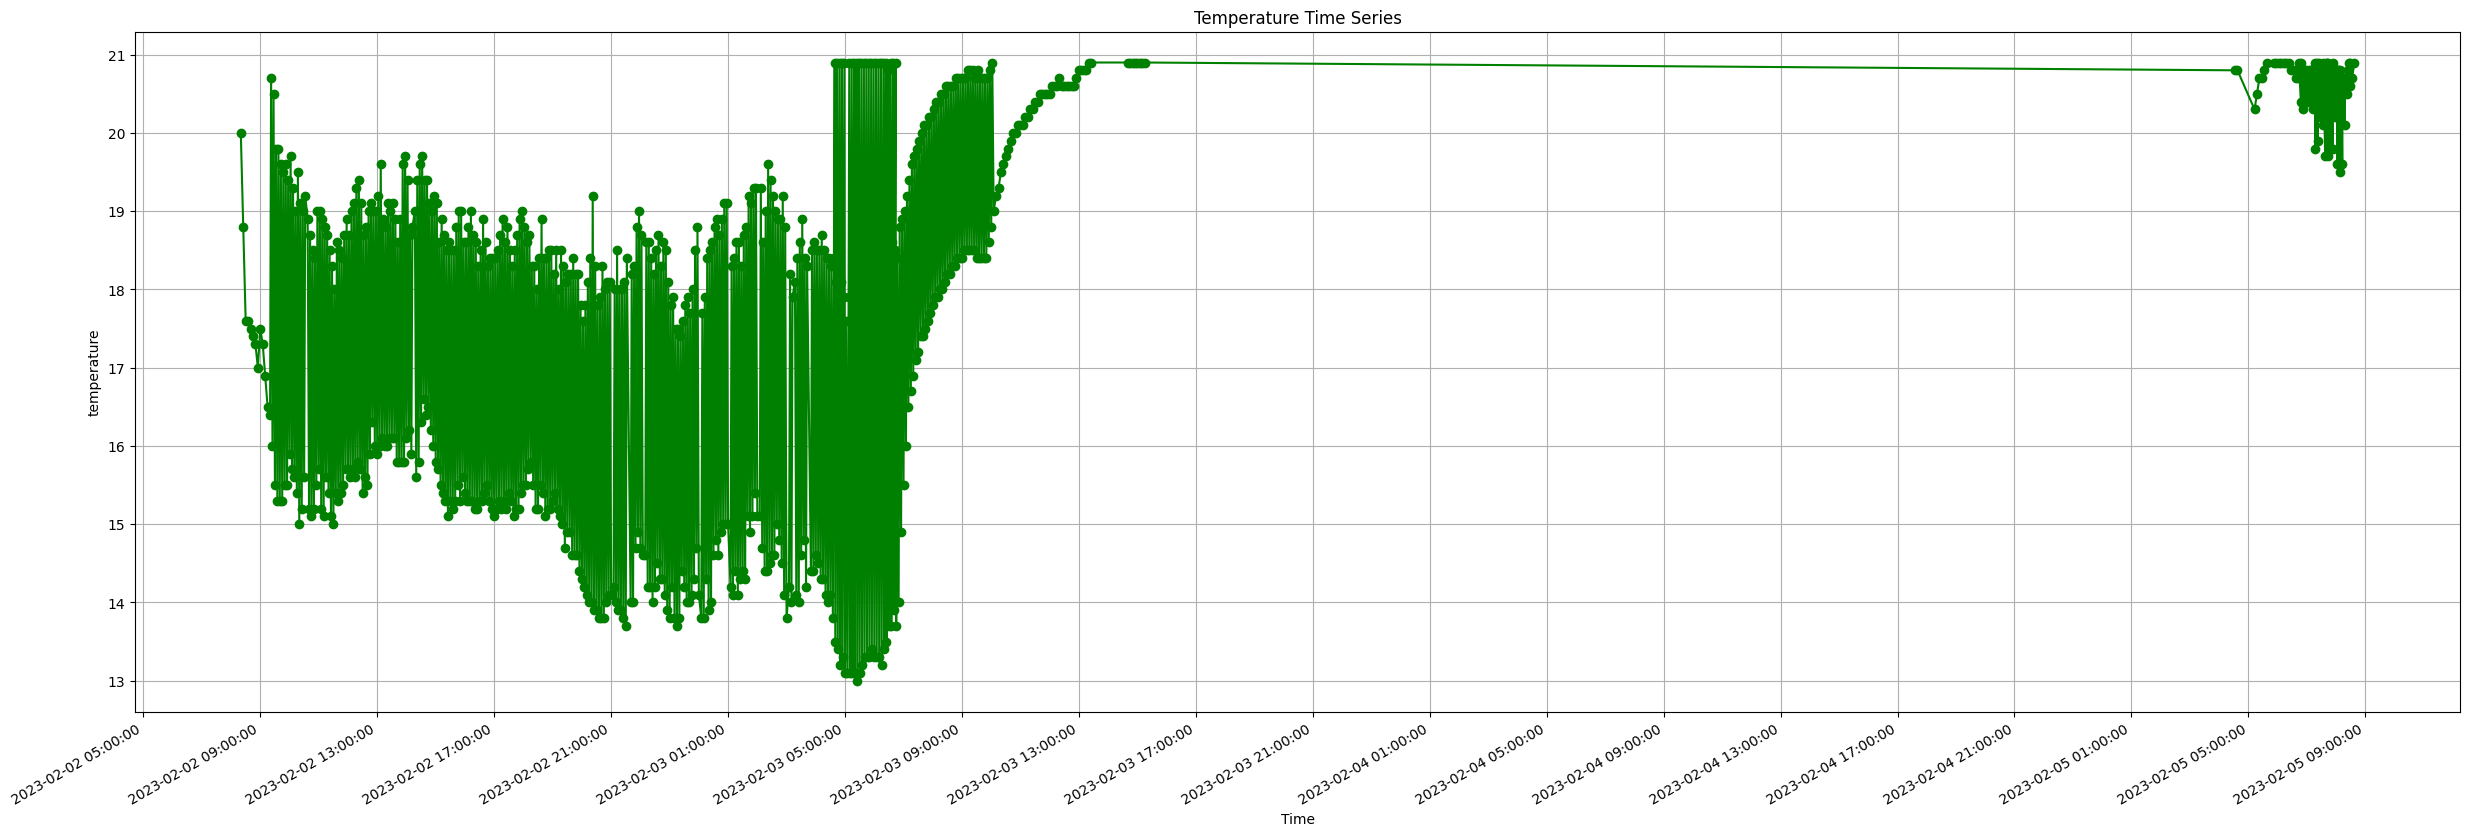

In [53]:
# Plotting against time
plt.figure(figsize=(30, 10))
plt.plot(temp_below_21['time'],temp_below_21['temp'],marker='o', linestyle='-',color=colors[i])

# Formatting the plot
plt.title(f'Temperature Time Series')
plt.xlabel('Time')
plt.ylabel('temperature')
plt.grid(True)

# Improve formatting of dates on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.gcf().autofmt_xdate()

plt.show()

In [54]:
# where humidity is below 20 
hum_below_20 = df_iaq_floor_3[df_iaq_floor_3['humidity'] <20].copy()
hum_below_20

,temp,humidity,co2,sensor_id,time,floor_index,outlier_temp,outlier_co2,outlier_humidity,time_plus_one_hour,hour,day,hour_block,week


## Floor 4

In [55]:
# where CO2 is above 1000ppm
co2_above_1000 = df_iaq_floor_4[df_iaq_floor_4['co2'] >1000].copy()
co2_above_1000

,temp,humidity,co2,sensor_id,time,floor_index,outlier_temp,outlier_co2,outlier_humidity,time_plus_one_hour,hour,day,hour_block,week
1421,23.3,24,1006.0,ENKZYW001888,2023-01-23 09:29:06+00:00,4,False,False,False,2023-01-23 10:29:06+00:00,10,23,9,4
1433,23.3,24,1027.0,ENKZYW001888,2023-01-23 09:34:06+00:00,4,False,False,False,2023-01-23 10:34:06+00:00,10,23,9,4
1443,24.6,22,1023.0,ENKZYW001900,2023-01-23 09:35:16+00:00,4,False,False,False,2023-01-23 10:35:16+00:00,10,23,9,4
1444,23.8,22,1012.0,ENKZYW001883,2023-01-23 09:35:19+00:00,4,False,False,False,2023-01-23 10:35:19+00:00,10,23,9,4
1445,23.4,23,1004.0,ENKZYW001884,2023-01-23 09:37:31+00:00,4,False,False,False,2023-01-23 10:37:31+00:00,10,23,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84811,24.3,36,1058.0,ENKZYW001935,2023-02-15 12:25:50+00:00,4,False,False,False,2023-02-15 13:25:50+00:00,13,46,12,7
84825,24.3,36,1075.0,ENKZYW001935,2023-02-15 12:30:50+00:00,4,False,True,False,2023-02-15 13:30:50+00:00,13,46,12,7
84839,24.4,36,1084.0,ENKZYW001935,2023-02-15 12:35:50+00:00,4,False,True,False,2023-02-15 13:35:50+00:00,13,46,12,7
84853,24.4,36,1084.0,ENKZYW001935,2023-02-15 12:40:50+00:00,4,False,True,False,2023-02-15 13:40:50+00:00,13,46,12,7


In [56]:
# First aggregation with sum, count, and percent for out_co2
sensor_stats = co2_above_1000.groupby(['day','sensor_id'])['outlier_co2'].agg(
    total_samples='count',
    total_outliers='sum',
    outliers_percent=lambda x: x.sum() / x.count()
)

# Second groupby to calculate the mean of co2
mean_co2 = co2_above_1000.groupby(['day','sensor_id'])['co2'].agg(
    mean_co2='mean',
    min_co2='min',
    max_co2='max'
)

# Join the mean_co2 series with the original sensor_stats dataframe
sensor_stats = sensor_stats.join(mean_co2)

sensor_stats


total_samples  total_outliers  outliers_percent  \
day sensor_id                                                       
23  ENKZYW001883             79              70          0.886076   
    ENKZYW001884             74              62          0.837838   
    ENKZYW001888             78              64          0.820513   
    ENKZYW001900             79              65          0.822785   
    ENKZYW001925             82              69          0.841463   
    ENKZYW001958             74              67          0.905405   
25  ENKZYW001883              2               0          0.000000   
    ENKZYW001900              2               0          0.000000   
    ENKZYW001925              1               0          0.000000   
    ENKZYW001958             13               0          0.000000   
26  ENKZYW001925              6               0          0.000000   
37  ENKZYW001888              3               0          0.000000   
38  ENKZYW001888             28               0          0.000000   
    ENKZYW001900             18               0          0.000000   
    ENKZYW001925              9               0          0.000000   
    ENKZYW001935              2               2          1.000000   
    ENKZYW001958              2               0          0.000000   
39  ENKZYW001883             23               0          0.000000   
    ENKZYW001888             39              16          0.410256   
    ENKZYW001900             32               0          0.000000   
    ENKZYW001925             40              15          0.375000   
    ENKZYW001935             42              30          0.714286   
    ENKZYW001958             18               0          0.000000   
40  ENKZYW001925              6               0          0.000000   
    ENKZYW001935             12               7          0.583333   
44  ENKZYW001935              9               0          0.000000   
45  ENKZYW001935             23               3          0.130435   
46  ENKZYW001935              6               3          0.500000   

                     mean_co2  min_co2  max_co2  
day sensor_id                                    
23  ENKZYW001883  1196.721519   1001.0   1308.0  
    ENKZYW001884  1170.986486   1004.0   1296.0  
    ENKZYW001888  1169.794872   1006.0   1308.0  
    ENKZYW001900  1174.607595   1001.0   1316.0  
    ENKZYW001925  1166.719512   1010.0   1269.0  
    ENKZYW001958  1198.689189   1004.0   1296.0  
25  ENKZYW001883  1001.000000   1001.0   1001.0  
    ENKZYW001900  1010.000000   1009.0   1011.0  
    ENKZYW001925  1003.000000   1003.0   1003.0  
    ENKZYW001958  1029.769231   1005.0   1050.0  
26  ENKZYW001925  1010.333333   1002.0   1023.0  
37  ENKZYW001888  1003.666667   1003.0   1005.0  
38  ENKZYW001888  1031.357143   1001.0   1052.0  
    ENKZYW001900  1031.500000   1001.0   1061.0  
    ENKZYW001925  1013.222222   1001.0   1035.0  
    ENKZYW001935  1169.000000   1063.0   1275.0  
    ENKZYW001958  1001.000000   1001.0   1001.0  
39  ENKZYW001883  1033.739130   1005.0   1054.0  
    ENKZYW001888  1049.974359   1002.0   1090.0  
    ENKZYW001900  1029.406250   1002.0   1052.0  
    ENKZYW001925  1057.775000   1005.0   1131.0  
    ENKZYW001935  1107.404762   1001.0   1216.0  
    ENKZYW001958  1021.222222   1006.0   1029.0  
40  ENKZYW001925  1008.333333   1004.0   1014.0  
    ENKZYW001935  1063.416667   1016.0   1095.0  
44  ENKZYW001935  1022.555556   1005.0   1029.0  
45  ENKZYW001935  1038.695652   1003.0   1068.0  
46  ENKZYW001935  1061.333333   1025.0   1084.0

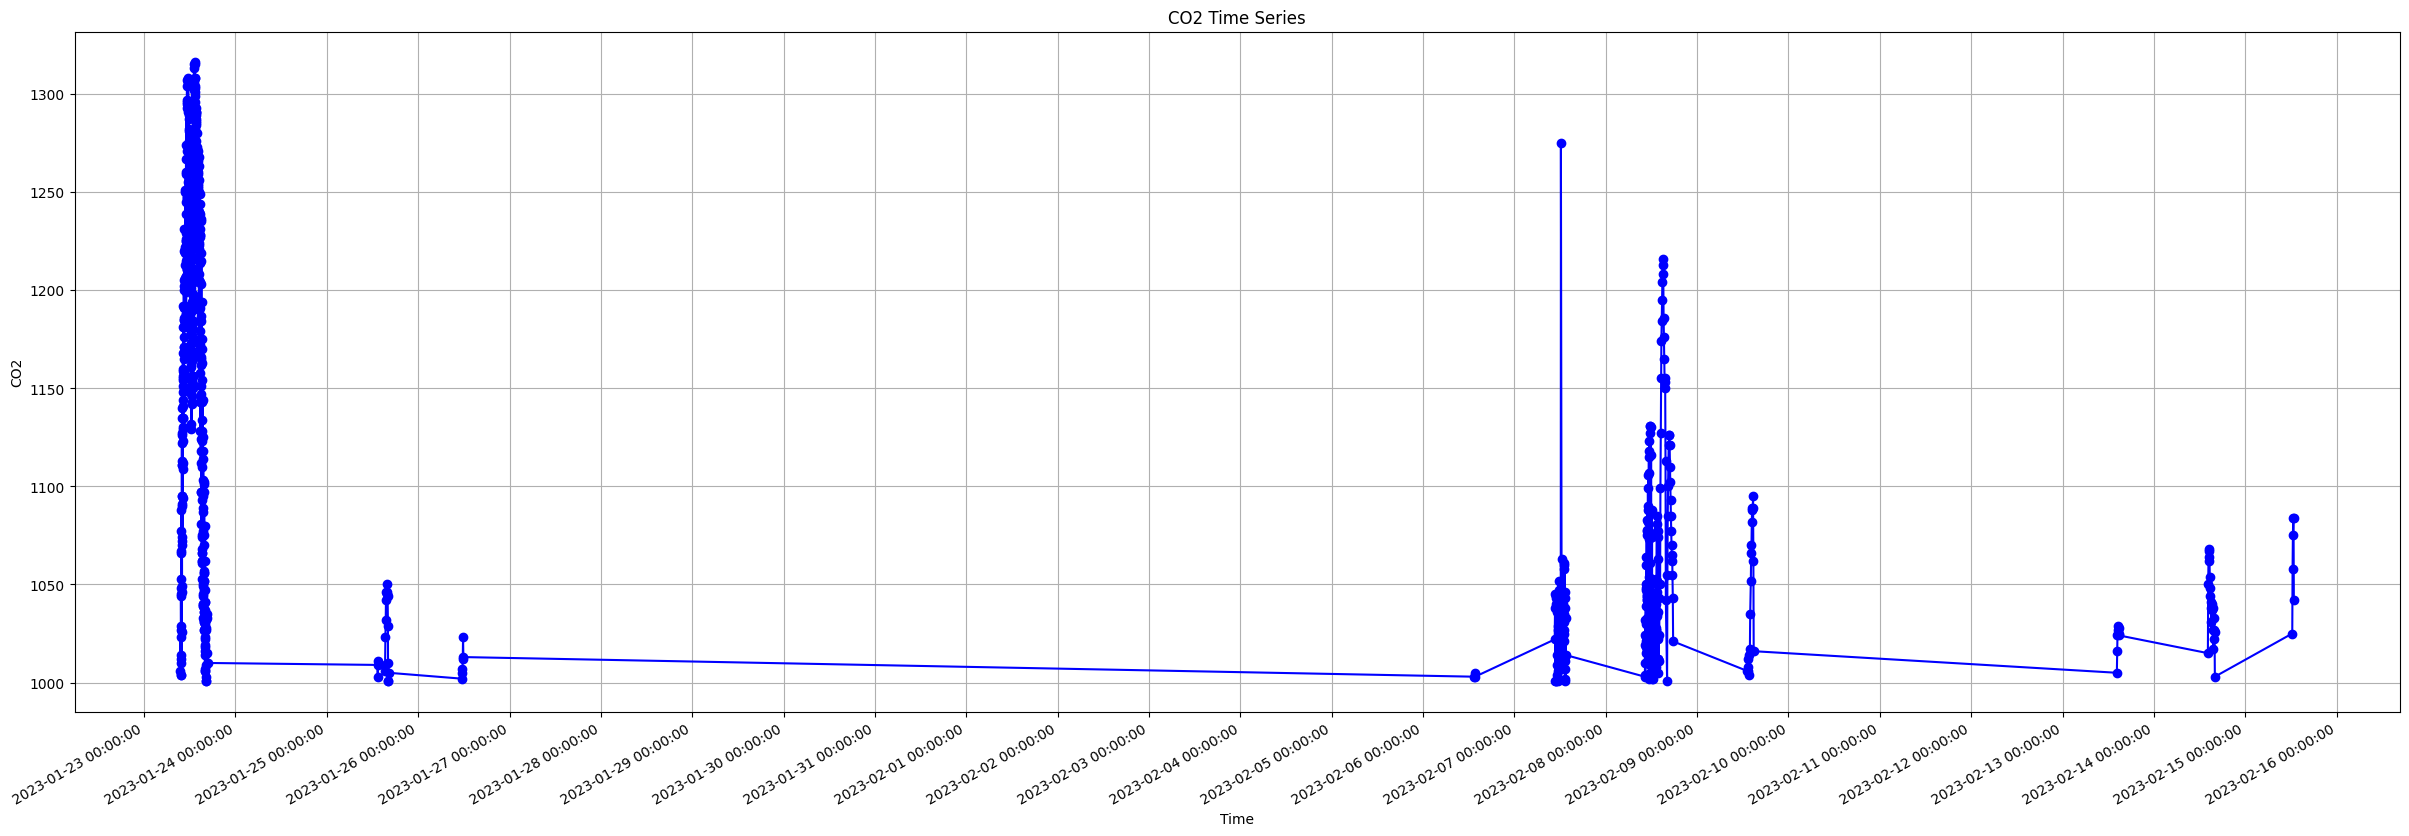

In [57]:
# Plotting against time
plt.figure(figsize=(30, 10))
plt.plot(co2_above_1000 ['time'],co2_above_1000 ['co2'],marker='o', linestyle='-',color=colors[0])

# Formatting the plot
plt.title(f'CO2 Time Series')
plt.xlabel('Time')
plt.ylabel('CO2')
plt.grid(True)

# Improve formatting of dates on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()  # Auto-rotate date labels



In [58]:
# where temp is below 21 
temp_below_21 = df_iaq_floor_4[df_iaq_floor_4['temp'] <21].copy()
temp_below_21 

,temp,humidity,co2,sensor_id,time,floor_index,outlier_temp,outlier_co2,outlier_humidity,time_plus_one_hour,hour,day,hour_block,week
21473,20.9,28,454.0,ENKZYW001884,2023-01-28 22:37:35+00:00,4,False,False,False,2023-01-28 23:37:35+00:00,23,28,22,4
21485,20.9,28,453.0,ENKZYW001884,2023-01-28 22:42:34+00:00,4,False,False,False,2023-01-28 23:42:34+00:00,23,28,22,4
21497,20.9,28,450.0,ENKZYW001884,2023-01-28 22:47:34+00:00,4,False,False,False,2023-01-28 23:47:34+00:00,23,28,22,4
21509,20.9,29,454.0,ENKZYW001884,2023-01-28 22:52:34+00:00,4,False,False,False,2023-01-28 23:52:34+00:00,23,28,22,4
21521,20.9,29,455.0,ENKZYW001884,2023-01-28 22:57:35+00:00,4,False,False,False,2023-01-28 23:57:35+00:00,23,28,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26550,20.8,36,831.0,ENKZYW001883,2023-01-30 10:50:20+00:00,4,False,False,False,2023-01-30 11:50:20+00:00,11,30,10,5
26562,20.8,36,847.0,ENKZYW001883,2023-01-30 11:00:20+00:00,4,False,False,False,2023-01-30 12:00:20+00:00,12,30,11,5
26565,20.9,37,801.0,ENKZYW001958,2023-01-30 11:03:35+00:00,4,False,False,False,2023-01-30 12:03:35+00:00,12,30,11,5
26574,20.9,36,850.0,ENKZYW001883,2023-01-30 11:05:20+00:00,4,False,False,False,2023-01-30 12:05:20+00:00,12,30,11,5


In [59]:
# First aggregation with sum, count, and percent for temperature
sensor_stats = temp_below_21.groupby(['day','sensor_id'])['outlier_temp'].agg(
    total_samples='count',
    total_outliers='sum',
    outliers_percent=lambda x: x.sum() / x.count()
)

# Second groupby to calculate the mean of temperature
mean_temp = temp_below_21.groupby(['day','sensor_id'])['temp'].agg(
    mean_temp='mean',
    min_temp='min',
    max_temp='max'
)

# Join the mean_temp series with the original sensor_stats dataframe
sensor_stats = sensor_stats.join(mean_temp)

sensor_stats

total_samples  total_outliers  outliers_percent  mean_temp  \
day sensor_id                                                                  
28  ENKZYW001884             16               0          0.000000  20.900000   
29  ENKZYW001883            173              63          0.364162  20.238728   
    ENKZYW001884            280              78          0.278571  20.363571   
    ENKZYW001888            150               0          0.000000  20.819333   
    ENKZYW001925             54               0          0.000000  20.820370   
    ENKZYW001958            200              49          0.245000  20.381000   
30  ENKZYW001883            130              89          0.684615  19.836154   
    ENKZYW001884            118              87          0.737288  19.732203   
    ENKZYW001888             85               0          0.000000  20.531765   
    ENKZYW001925             84               0          0.000000  20.669048   
    ENKZYW001958            127              85          0.669291  19.982677   

                  min_temp  max_temp  
day sensor_id                         
28  ENKZYW001884      20.9      20.9  
29  ENKZYW001883      19.5      20.9  
    ENKZYW001884      19.5      20.9  
    ENKZYW001888      20.5      20.9  
    ENKZYW001925      20.7      20.9  
    ENKZYW001958      19.7      20.9  
30  ENKZYW001883      19.3      20.9  
    ENKZYW001884      19.4      20.9  
    ENKZYW001888      20.4      20.9  
    ENKZYW001925      20.6      20.9  
    ENKZYW001958      19.5      20.9

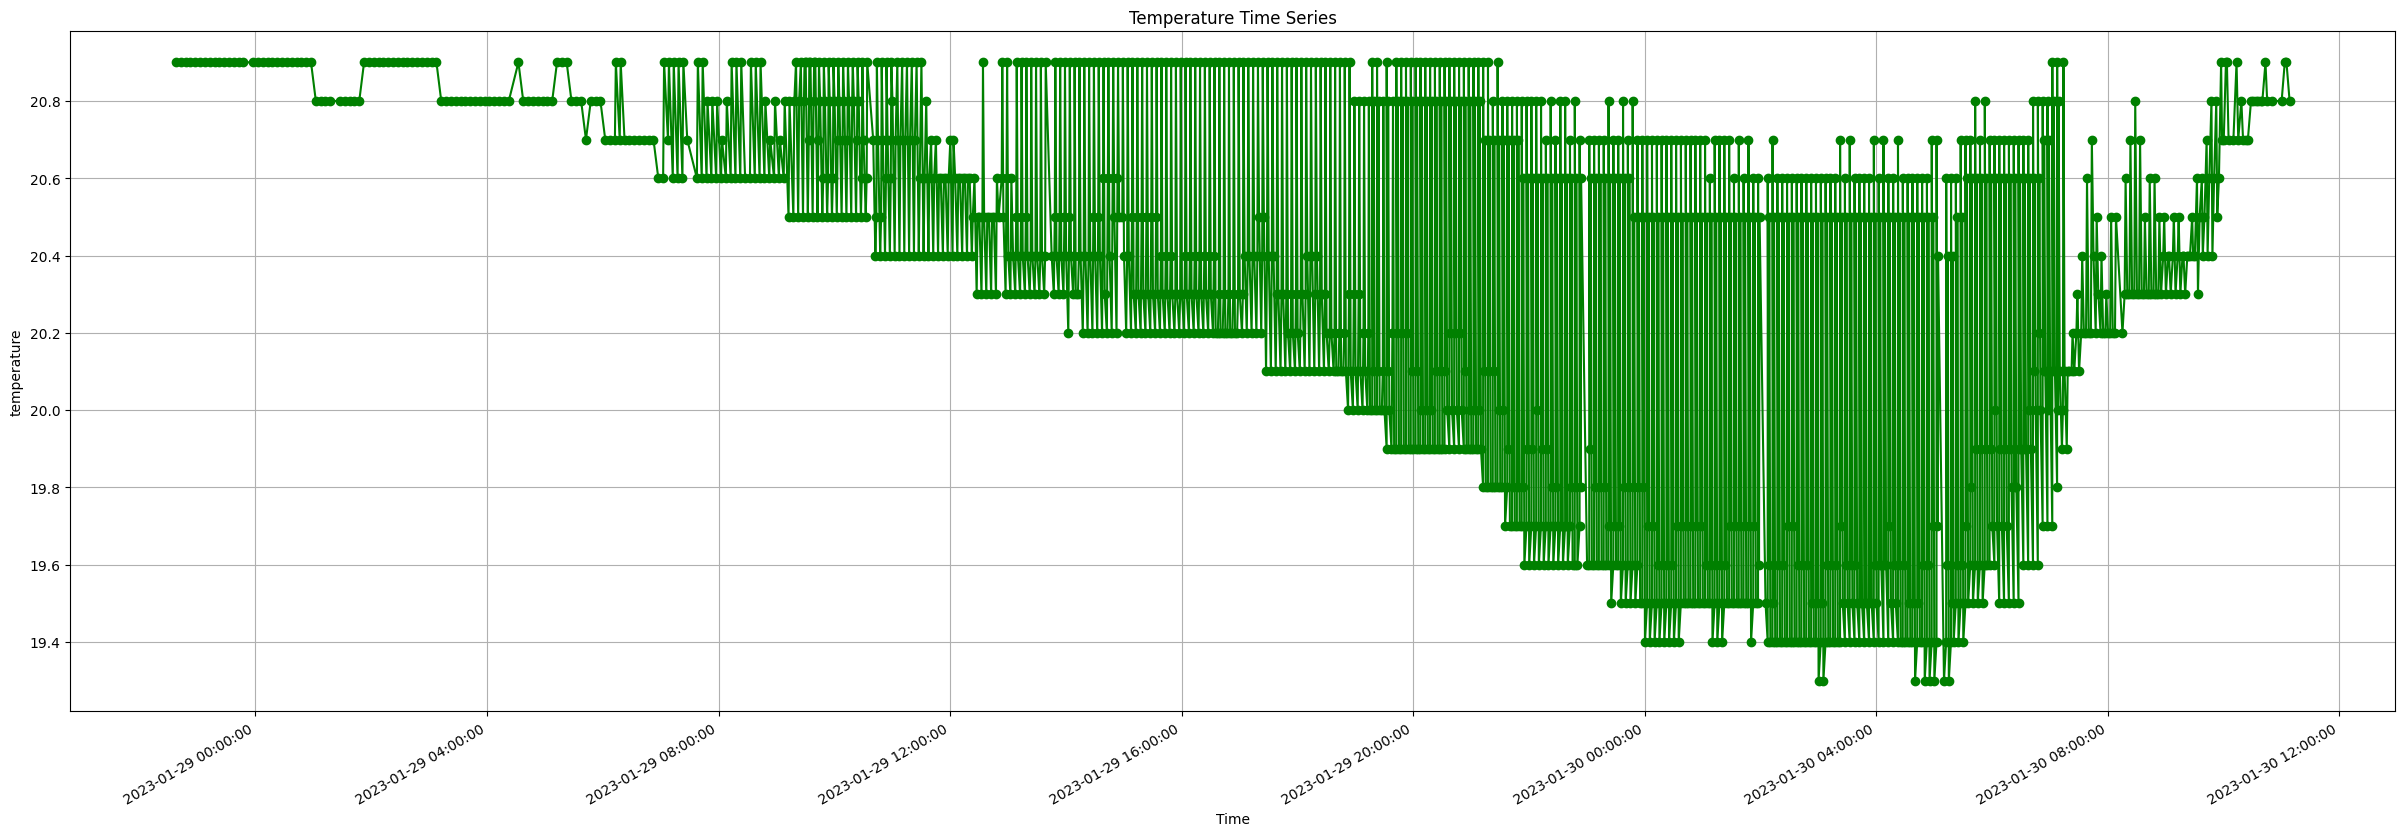

In [60]:
# Plotting against time
plt.figure(figsize=(30, 10))
plt.plot(temp_below_21['time'],temp_below_21['temp'],marker='o', linestyle='-',color=colors[i])

# Formatting the plot
plt.title(f'Temperature Time Series')
plt.xlabel('Time')
plt.ylabel('temperature')
plt.grid(True)

# Improve formatting of dates on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.gcf().autofmt_xdate() 

plt.show()

In [61]:
# where humidity is below 20 
hum_below_20 = df_iaq_floor_4[df_iaq_floor_4['humidity'] <20].copy()
hum_below_20

,temp,humidity,co2,sensor_id,time,floor_index,outlier_temp,outlier_co2,outlier_humidity,time_plus_one_hour,hour,day,hour_block,week
